# **Marco Casion 🚗**

## **Import des librairies 📕**

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from color import get_custom_color_palette_hash
from train_model import trainmodel, trainmodelGSCV
from z_score import zscore
from sklearn_manager import Preprocessor
from plots import featuresrepartition, plot_validation, plot_validation_bis, countplot, barplot, scatter

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
np.random.seed(42)

In [3]:
PAL = "ch:start=.2,rot=-.3"
COLORS = ['#c7dfdf','#a3c3cb','#86a5b8','#687c9c','#494c6e', '#373451', '#29243b']
COLORS2 = ['#FF0000', '#582900']

## **Lecture des données 📁**

In [4]:
data_train_global = pd.read_csv("../../data/curated/train.csv", usecols=["Name", "Year", "Owner_Type", "Seats", "Kilometers_Driven", "Fuel_Type", "Transmission", "Mileage", "Engine", "Power", "Price"])
data_train_global.head()

,Name,Year,Owner_Type,Seats,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,Hyundai Creta 1.6 CRDi SX Option,2015,First,5,41000.0,Diesel,Manual,19.67,1582.0,126.20,12.50
1,Honda Jazz V,2011,First,5,46000.0,Petrol,Manual,18.20,1199.0,88.70,4.50
2,Suzuki Ertiga VDI,2012,First,7,87000.0,Diesel,Manual,20.77,1248.0,88.76,6.00
3,Audi A4 New 2.0 TDI Multitronic,2013,Second,5,40670.0,Diesel,Automatic,15.20,1968.0,140.80,17.74
4,Nissan Micra Diesel XV,2013,First,5,86999.0,Diesel,Manual,23.08,1461.0,63.10,3.50


In [5]:
data = data_train_global.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5807 non-null   object 
 1   Year               5807 non-null   int64  
 2   Owner_Type         5807 non-null   object 
 3   Seats              5807 non-null   int64  
 4   Kilometers_Driven  5807 non-null   float64
 5   Fuel_Type          5807 non-null   object 
 6   Transmission       5807 non-null   object 
 7   Mileage            5807 non-null   float64
 8   Engine             5807 non-null   float64
 9   Power              5807 non-null   float64
 10  Price              5807 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 499.2+ KB


In [7]:
data.describe()

,Year,Seats,Kilometers_Driven,Mileage,Engine,Power,Price
count,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000
mean,2013.475805,5.286551,5.834902e+04,18.206856,1631.839332,113.827634,9.673429
std,3.170718,0.806790,9.265556e+04,4.288795,601.822651,53.903495,11.292012
min,1998.000000,2.000000,1.710000e+02,0.000000,624.000000,34.200000,0.440000
25%,2012.000000,5.000000,3.328800e+04,15.260000,1198.000000,78.000000,3.590000
50%,2014.000000,5.000000,5.240000e+04,18.200000,1497.000000,98.600000,5.750000
75%,2016.000000,5.000000,7.245750e+04,21.100000,1991.000000,139.040000,10.250000
max,2019.000000,10.000000,6.500000e+06,28.400000,5998.000000,560.000000,160.000000


## **Analyse Originale - Visualisation 📊**
##### *Afin de pouvoir mieux appréhender un jeu de données, émettre des hypothèses et en tirer des conclusions, il est important de passer par une étape de visualisation.* 
##### *A l’aide de la librairie Seaborn, j’ai pu :*  
##### *⦁	Mieux comprendre les données*
##### *⦁	Observer la distribution des features*  
##### *⦁	Observer des tendances générales*  

Nombres des variables quantitatives:  7
Nombres des variables qualitatives:  4


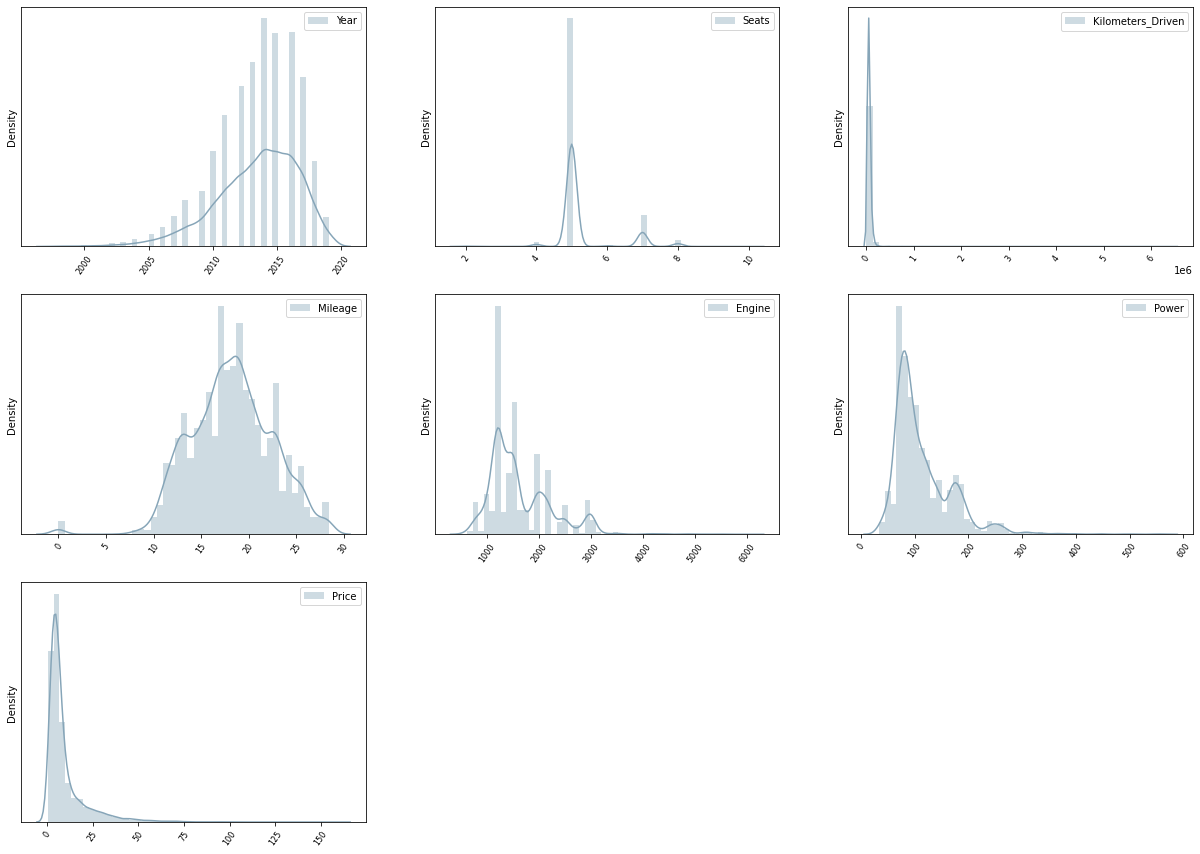

In [8]:
### Répartition des features
featuresrepartition(data, COLORS[2])

##### *Après avoir observé la distribution de mes features, je m’aperçois qu'il y a clairement une ou des valeurs outlier dans la feature Kilometers_Driven. En effet, après analyse une voiture possède plus de 6 000 000 de kilomètres ! Cette valeur aberrante m’amène à supprimer cette ligne.*

In [9]:
datakm = data[data["Kilometers_Driven"] > 300000]
datakm

,Name,Year,Owner_Type,Seats,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
323,Skoda Octavia Ambition Plus 2.0 TDI AT,2013,First,5,775000.0,Diesel,Automatic,19.30,1968.0,141.00,7.50
341,Hyundai i10 Magna 1.2,2009,First,5,620000.0,Petrol,Manual,20.36,1197.0,78.90,2.70
1796,Volkswagen Vento Diesel Highline,2013,First,5,720000.0,Diesel,Manual,20.54,1598.0,103.60,5.90
2245,BMW X5 xDrive 30d M Sport,2017,First,5,6500000.0,Diesel,Automatic,15.97,2993.0,258.00,65.00
2713,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,2015,First,5,480000.0,Diesel,Automatic,16.96,1968.0,138.03,13.00
2975,Honda City i VTEC SV,2015,First,5,480000.0,Petrol,Manual,17.40,1497.0,117.30,5.00
4327,Hyundai i20 Magna Optional 1.2,2013,First,5,445000.0,Petrol,Manual,18.50,1197.0,82.90,4.45


In [10]:
data = data[data["Kilometers_Driven"].between(left=0, right=300000)]

##### *⦁	Plus une voiture est récente plus son prix est élevé ; cette tendance est très marquée et est très linéaire. Hélas les données ne remontent pas avant 1998. Si c'était le cas nous aurions alors l'effet inverse, notamment avec les voitures de collection (à partir de 30 ans)*

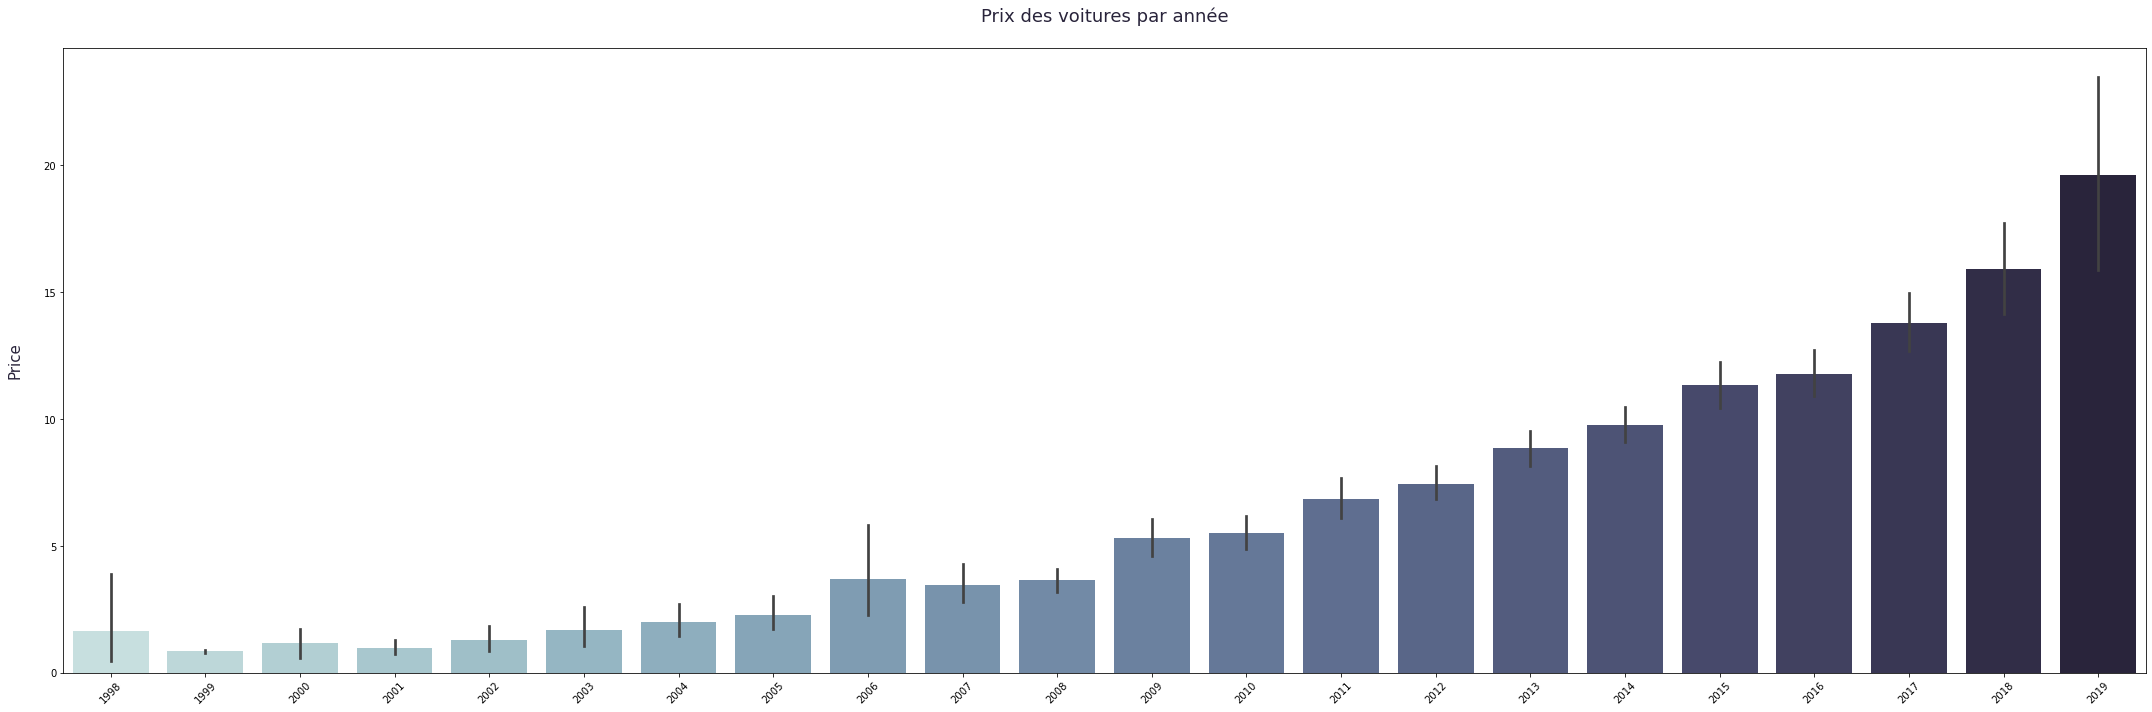

In [12]:
barplot(data, "Year", "Price", PAL, COLORS[6], COLORS[6], "Prix des voitures par année")

##### *⦁	Plus la voiture est puissante, globalement, plus elle est chère, même si l’on observe quelques variations à cette tendance*

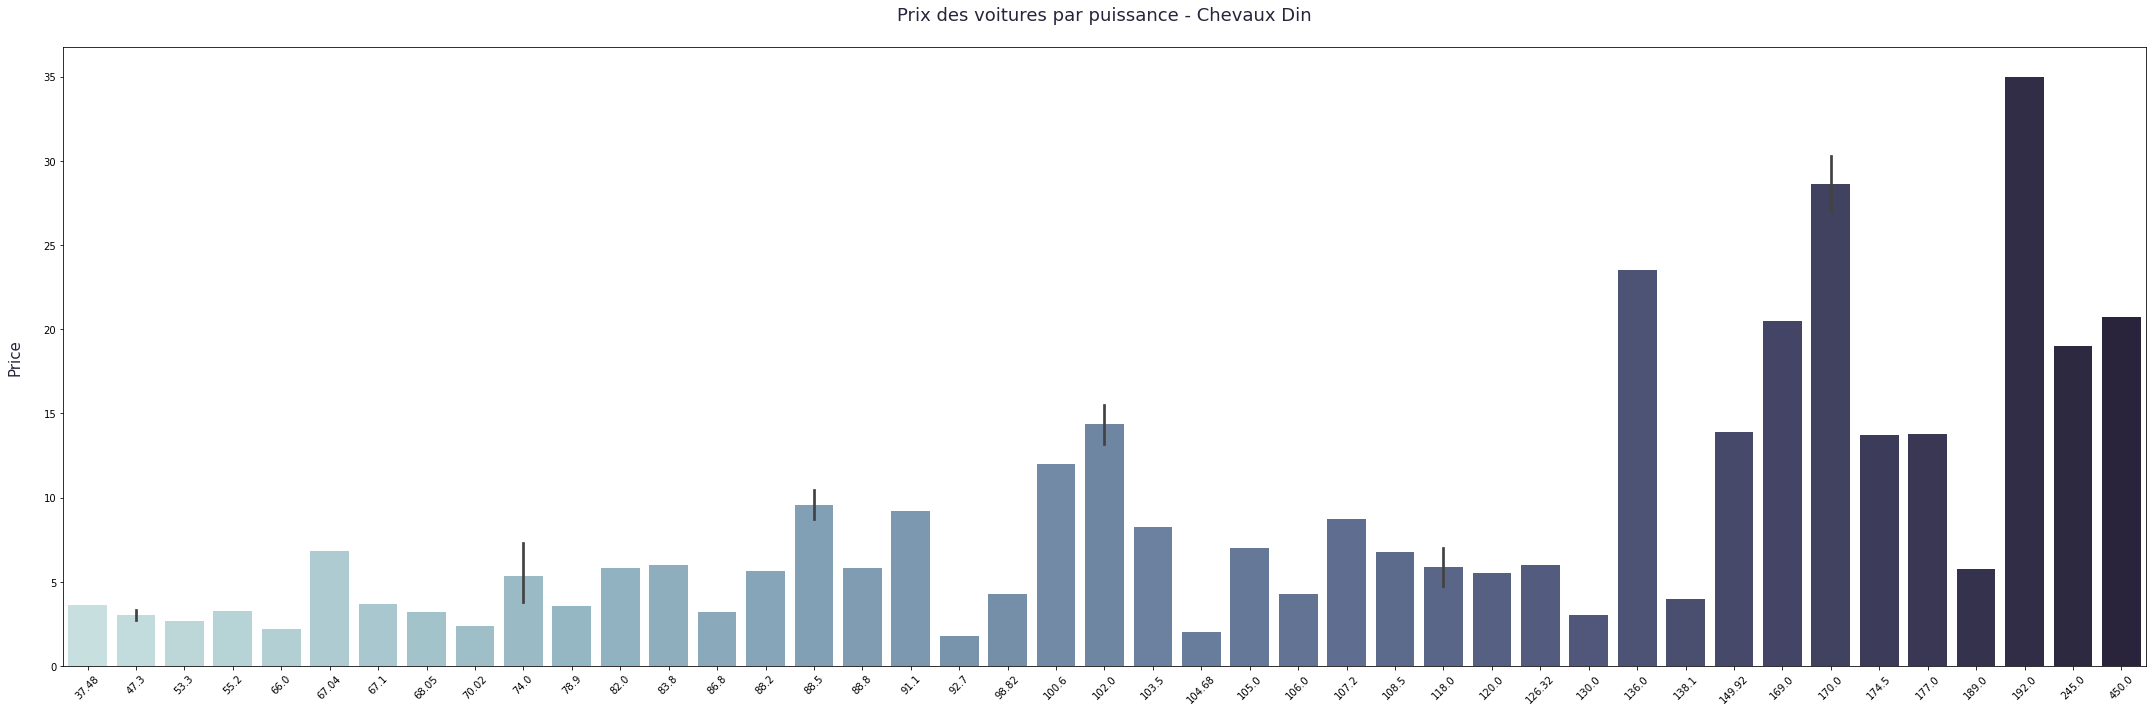

In [13]:
barplot(data.sample(50), "Power", "Price", PAL, COLORS[6], COLORS[6], "Prix des voitures par puissance - Chevaux Din")

##### *⦁    Idem concernant les cylindrées.*

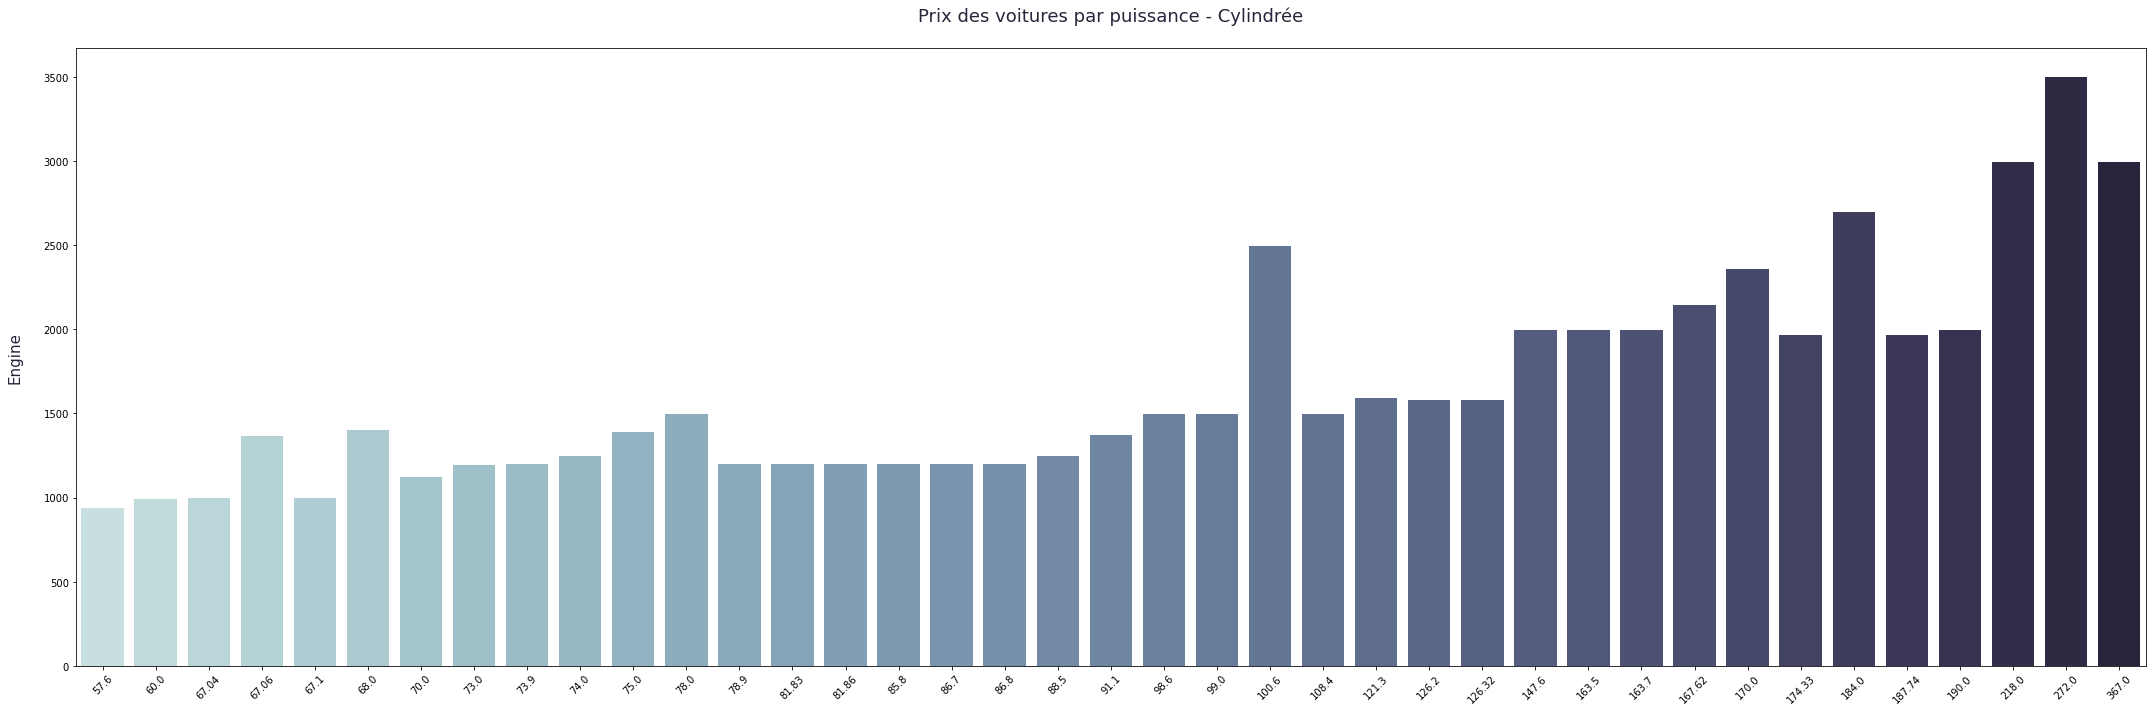

In [14]:
barplot(data.sample(50), "Power", "Engine", PAL, COLORS[6], COLORS[6], "Prix des voitures par puissance - Cylindrée")

##### *⦁	Moins il y a de places dans la voiture, plus celle-ci est chère, mais cette liaison est surtout marquée pour les véhicules n’ayant que 2 places par rapport aux autres véhicules. Si l’on essaie de comprendre ce qui explique cette observation, on s’aperçoit que les voitures 2 places sont pour la plupart des voitures sportives, avec donc de grosses cylindrées (Engine) et beaucoup de chevaux (Power), donc logiquement plus chères (voir ci-dessous les voitures 2 places et leurs puissances respectives).*


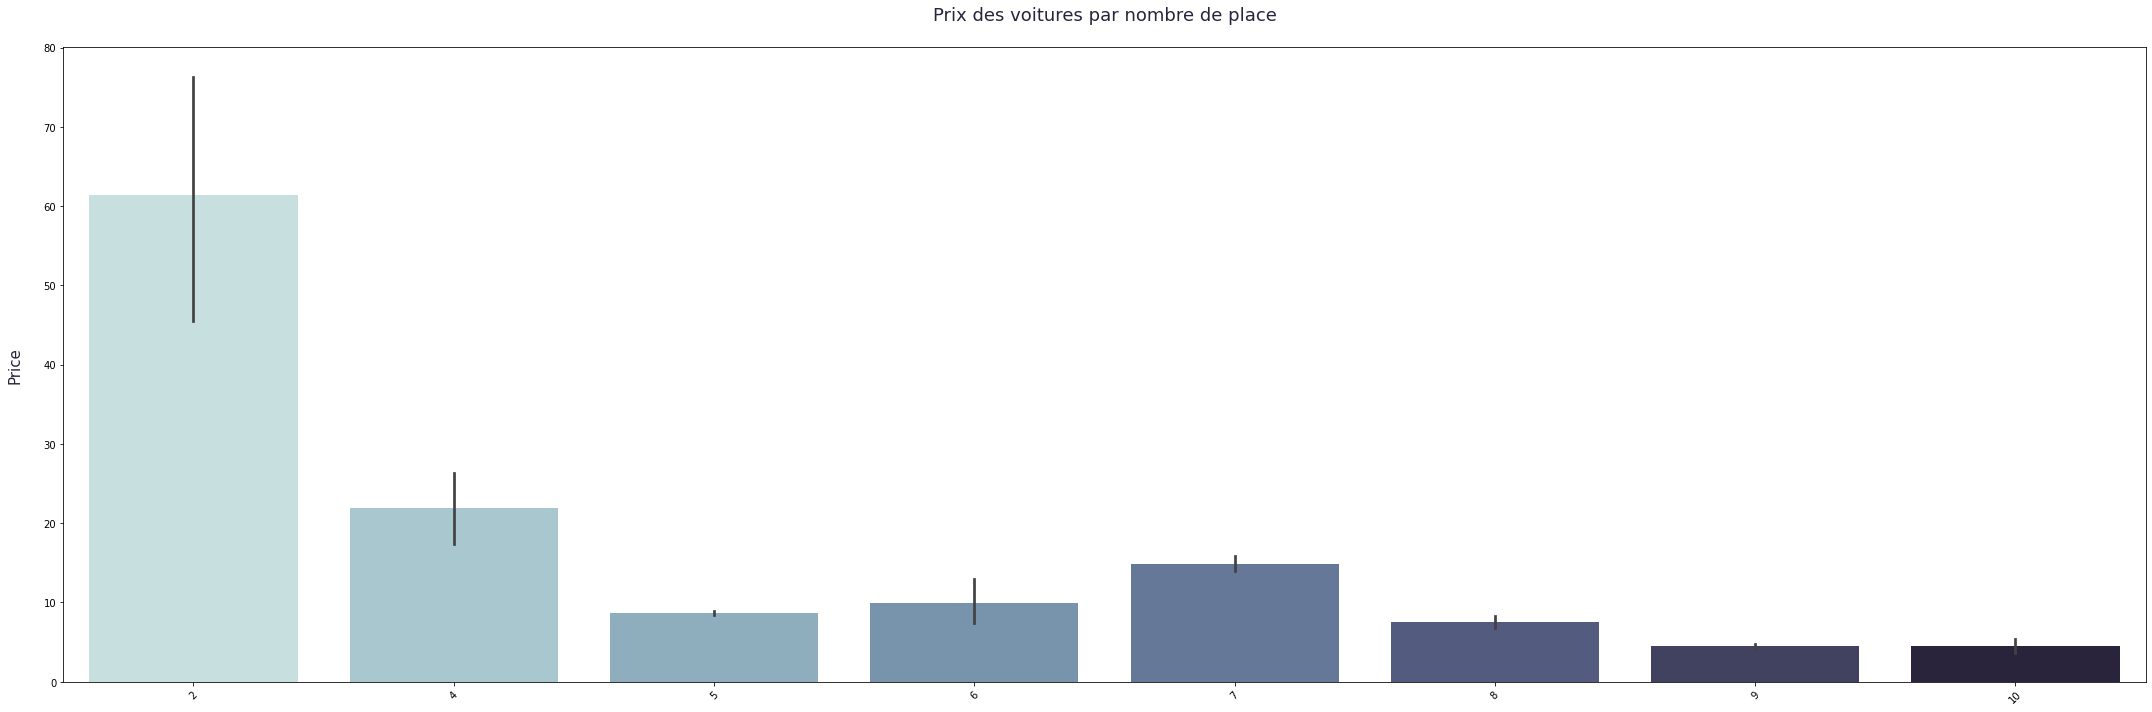

In [15]:
barplot(data, "Seats", "Price", PAL, COLORS[6], COLORS[6], "Prix des voitures par nombre de place")

In [16]:
sportives = data["Seats"]==2
data[sportives]

,Name,Year,Owner_Type,Seats,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
127,Mercedes-Benz SLC 43 AMG,2017,First,2,13372.0,Petrol,Automatic,19.00,2996.0,362.07,54.00
534,Audi TT 2.0 TFSI,2013,First,2,12100.0,Petrol,Automatic,9.90,1984.0,207.80,29.50
666,Mercedes-Benz SLK-Class SLK 350,2016,First,2,22732.0,Petrol,Automatic,18.10,3498.0,306.00,55.54
767,Mercedes-Benz SLK-Class SLK 350,2015,First,2,10000.0,Petrol,Automatic,18.10,3498.0,306.00,55.00
1038,Porsche Boxster S tiptronic,2015,First,2,10512.0,Petrol,Automatic,8.60,2706.0,265.00,64.00
1242,Audi TT 2.0 TFSI,2014,First,2,14262.0,Petrol,Automatic,9.90,1984.0,207.80,27.35
2024,Mercedes-Benz SLC 43 AMG,2019,First,2,2526.0,Petrol,Automatic,19.00,2996.0,362.07,83.96
4523,Mercedes-Benz SLK-Class 55 AMG,2014,Second,2,3000.0,Petrol,Automatic,12.00,5461.0,421.00,90.00
4550,Mercedes-Benz SL-Class SL 500,2010,First,2,35000.0,Petrol,Automatic,8.10,5461.0,387.30,29.50
4717,BMW Z4 2009-2013 Roadster 2.5i,2018,First,2,9952.0,Petrol,Automatic,10.37,2979.0,306.00,58.54


In [17]:
data["Seats"].value_counts()

5     4857
7      668
8      133
4       93
6       29
2       13
10       4
9        3
Name: Seats, dtype: int64

##### *⦁    Plus une voiture a réalisé de kilomètres moins son prix est élevé ; une certaine variabilité est observée sur cette tendance générale avec pour un même kilométrage des prix très différents*


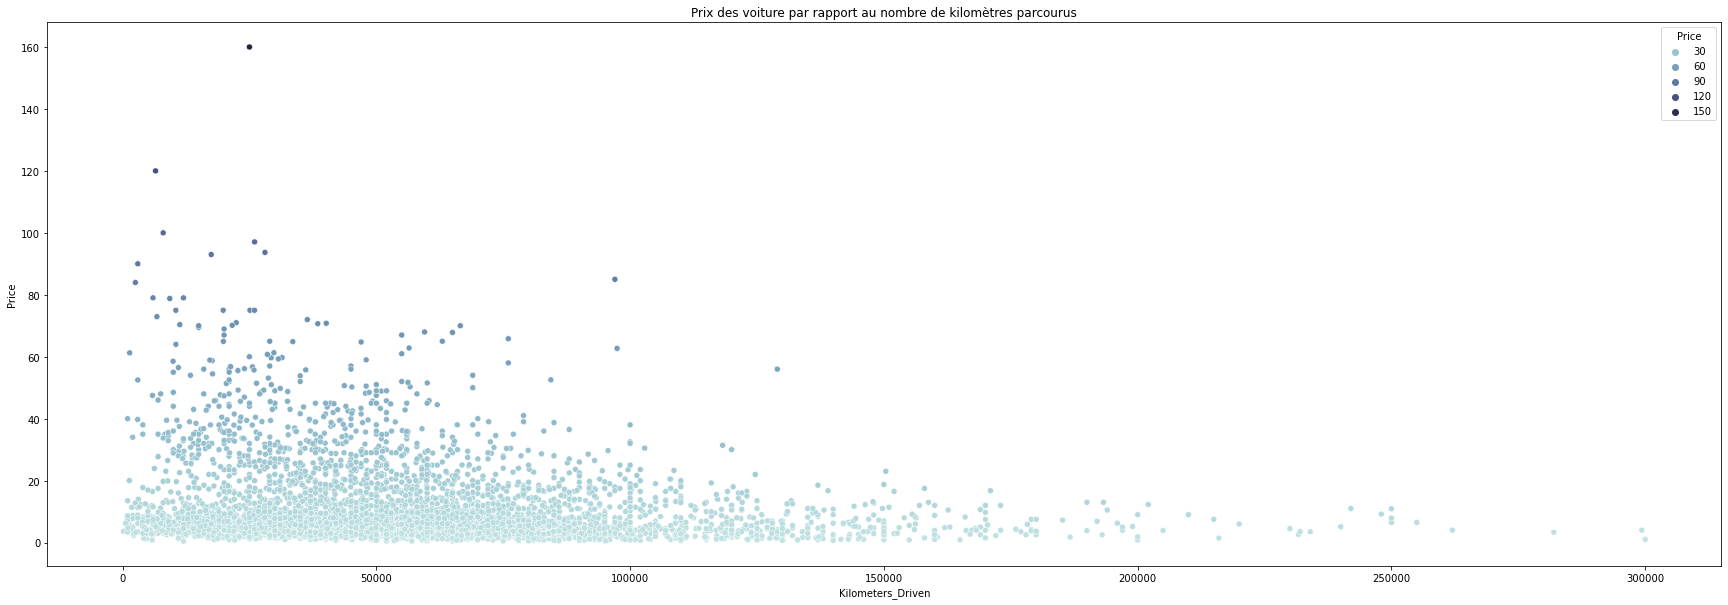

In [18]:
scatter(data, "Price", "Kilometers_Driven", "Prix des voiture par rapport au nombre de kilomètres parcourus")

##### *⦁	D'après ce graphique, moins une voiture consomme plus elle est chère. L'explication vient du fait que, plus une voiture est récente, moins elle consomme de carburant. Mais plus elle est récente, plus son prix est élevé.*

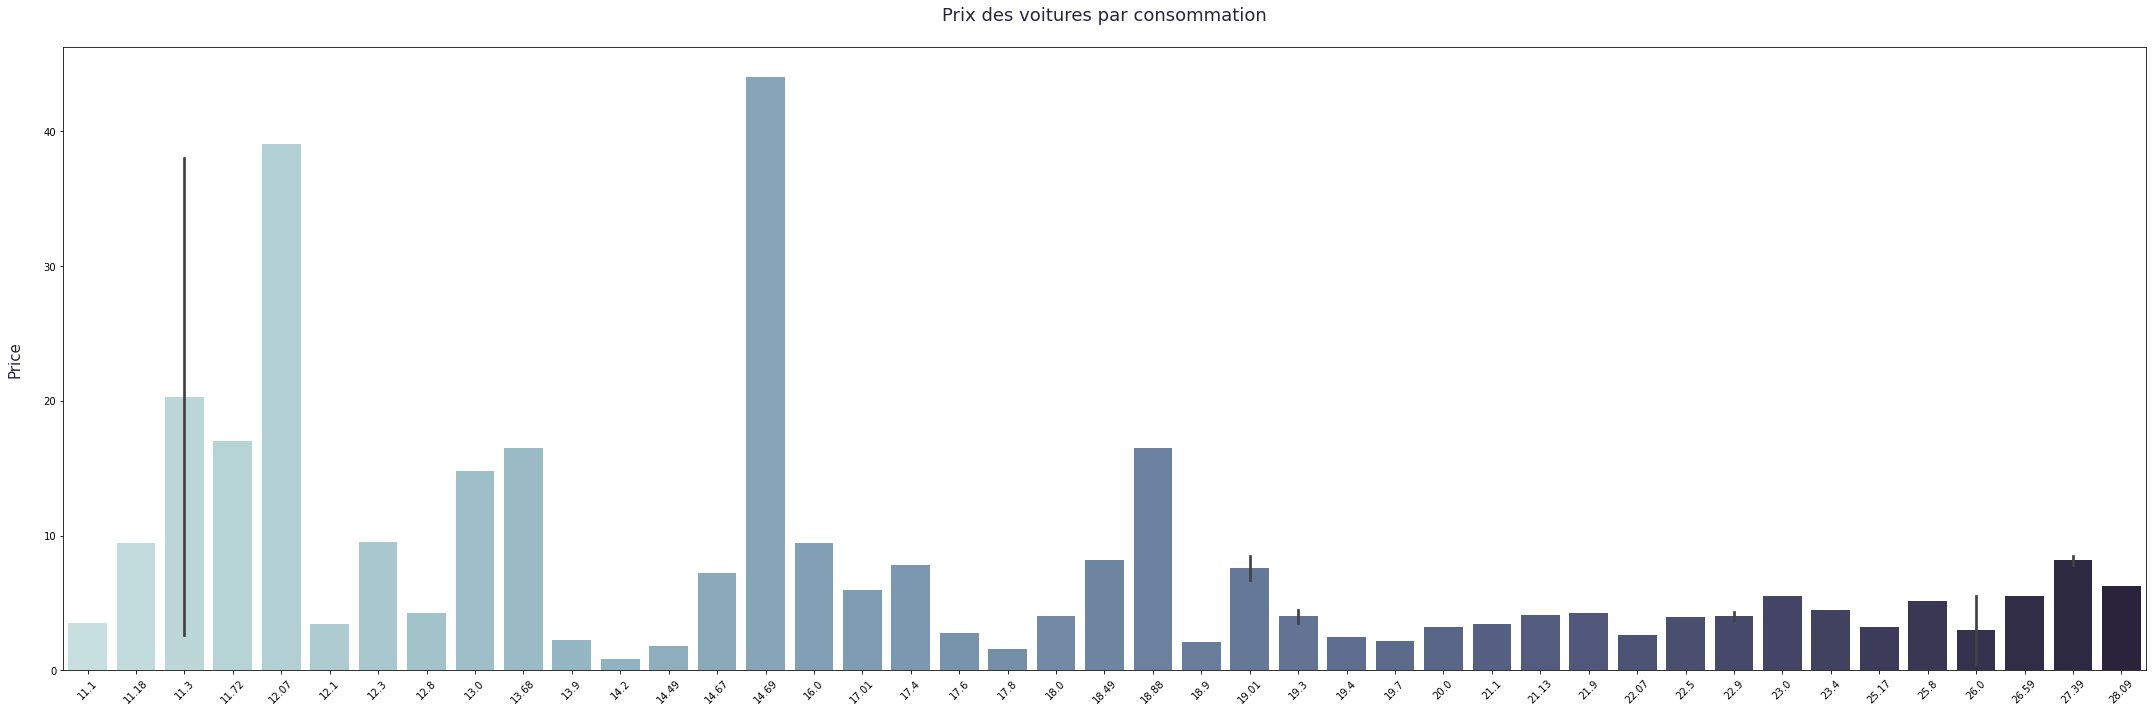

In [19]:
barplot(data.sample(50), "Mileage", "Price", PAL, COLORS[6], COLORS[6], "Prix des voitures par consommation")

##### *La matrice des corrélations entre variables permet de visualiser les liens entre les variables utilisées.  Il est notamment intéressant de s’assurer de corrélations élevées ou au contraire très faibles entre variables.*
##### *⦁    On note des corrélations positives assez marquées entre prix et puissance, ou encore des corrélations négatives entre prix et consommation de carburants et la cylindrée du véhicule.*


<AxesSubplot:>

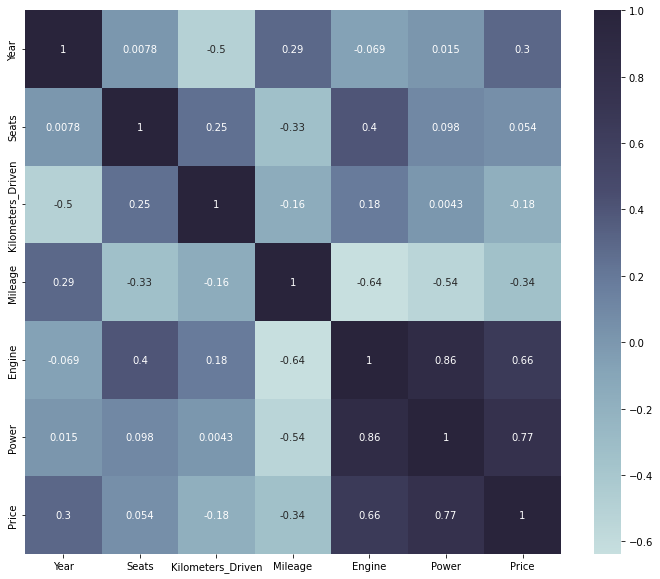

In [20]:
correlation = data.corr()
plt.figure(figsize=(12,10))
cmap = get_custom_color_palette_hash()
sns.heatmap(correlation, xticklabels=True, yticklabels=True, cmap=cmap, annot=True)

#### Correlation des features par rapport au prix

In [11]:
corr_matrix = data.corr()
corr_matrix["Price"].sort_values(ascending=False).to_frame()

,Price
Price,1.000000
Power,0.772261
Engine,0.656617
Year,0.300315
Seats,0.053565
Kilometers_Driven,-0.180279
Mileage,-0.340973


## **Attribution et suppression de la cible 🎯**

In [21]:
TARGET = data["Price"]

In [22]:
data.drop(["Name","Price"], axis=1, inplace=True)

## **Normalisation de mes données (TRAIN et TEST) via un preprocessor💻**

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

##### *Mon jeu de données possède des features numériques et catégorielles. Je décide donc de créer un objet preprocessor issu de ma classe Preprocessor. Ce preprocessor à pour but d'appliquer un MinMaxScaler sur les colonnes de types numériques et un OneHotEncoder sur les colonnes de types catégorielles*

##### *MinMaxScaler --> Transforme les entités en adaptant chaque entité à une plage donnée. Cet estimateur met à l'échelle et traduit chaque caractéristique individuellement de telle sorte qu'elle se situe dans la plage donnée sur l'ensemble d'apprentissage, par exemple entre zéro et un.*

##### *OneHotEncoder --> Encode les caractéristiques catégorielles sous la forme d'un tableau numérique unique. L'entrée de ce transformateur doit être un tableau d'entiers ou de chaînes, indiquant les valeurs prises par les caractéristiques catégorielles (discrètes). Les caractéristiques sont encodées à l'aide d'un schéma d'encodage one-hot (alias 'one-of-K' ou 'dummy'). Cela crée une colonne binaire pour chaque catégorie et renvoie une matrice clairsemée ou un tableau dense (selon le sparse paramètre)*

In [23]:
preprocessor = Preprocessor()
preprocessor.fit(data)
preprocessor.save("../../data/preprocessor/preprocessor")

In [24]:
NUM_COL_LIST = data.select_dtypes(exclude='object').columns.tolist()
CAT_COL_LIST = []

for col in data.select_dtypes(include='object').columns:
    CAT_COL_LIST += [col + '*' + elem for elem in data[col].unique().tolist()]

data_preprocessed = pd.DataFrame(preprocessor.transform(data), columns = NUM_COL_LIST + CAT_COL_LIST)

print(f"DATA shape: {str(data.shape)}\nDATA shape:: {str(data_preprocessed.shape)}")
data_preprocessed.head()

DATA shape: (5800, 9)
DATA shape:: (5800, 14)


,Year,Seats,Kilometers_Driven,Mileage,Engine,Power,Owner_Type*First,Owner_Type*Second,Owner_Type*Fourth & Above,Owner_Type*Third,Fuel_Type*Diesel,Fuel_Type*Petrol,Transmission*Manual,Transmission*Automatic
0,0.809524,0.375,0.136174,0.692606,0.178266,0.174971,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.619048,0.375,0.152850,0.640845,0.106997,0.103652,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.666667,0.625,0.289595,0.731338,0.116115,0.103766,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.714286,0.375,0.135074,0.535211,0.250093,0.202739,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.714286,0.375,0.289592,0.812676,0.155750,0.054964,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## **Séparation des données** ✂️

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_preprocessed, TARGET, test_size=0.2 , shuffle=True)
print(f"X_train shape: {str(X_train.shape)} \nX_test shape: {str(X_test.shape)}")

X_train shape: (4640, 14) 
X_test shape: (1160, 14)


![Alt text](https://github.com/tomcdev63/DIPLOME_DEV_IA/blob/main/E1_chef_doeuvre_marco_casion/IMG/Captur%C3%B9%C3%B9e.JPG?raw=true)

## **Création d'un modèle de regression linéaire avec LinearRegression 📈**

Score du jeu TRAIN
MAE:  3.7448482516397807
RMSE:  6.185174510894601
Median abs err:  2.4868089990974016
R2:  0.6973264979976201

Score du jeu TEST
MAE:  3.8231591018670597
RMSE:  5.979414943306585
Median abs err:  2.483653307505288
R2:  0.7247163194631814


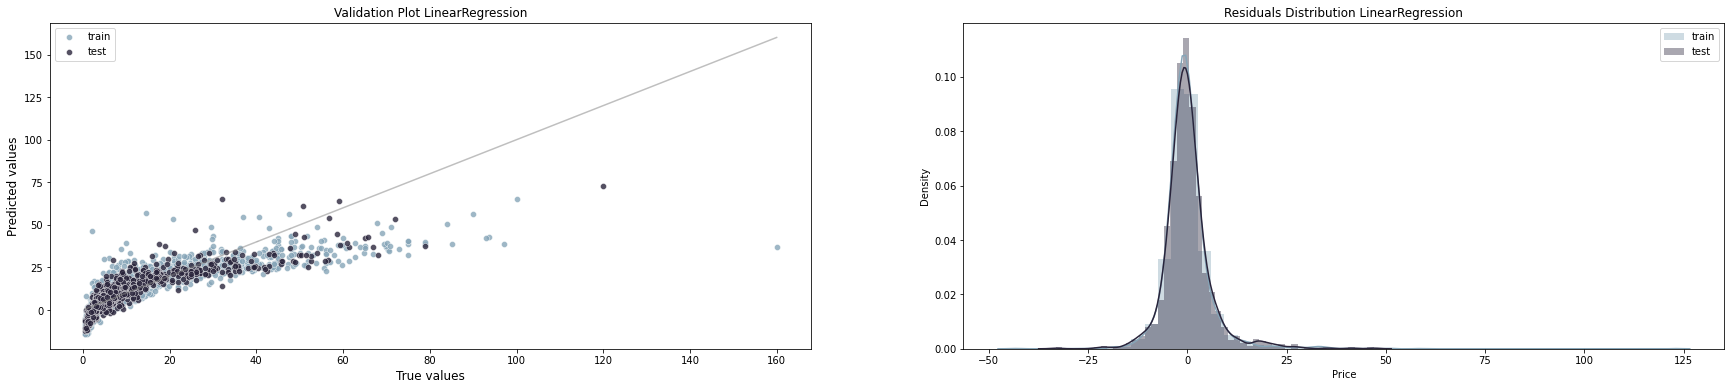

In [26]:
model_ll = trainmodel(LinearRegression, X_train, y_train, X_test, y_test)

plot_ll = plot_validation_bis(model_ll, X_train, y_train, X_test, y_test, TARGET, "LinearRegression", COLORS[2], COLORS[6])

##### *Le score R2 de l’algorithme LinearRegression est de 0.72%. Comme le montre le premier graphique l’ensemble des points ne suit pas l’équation donnée par la régression linéaire issue de l’algorithme LinearRegression de la librairie SKlearn. On observe en particulier un éloignement des valeurs réelles par rapport aux valeurs prédites pour les valeurs réelles élevées ou très faibles.*


## **Création d'un modèle de regression avec RandomForestRegressor 🌲**

Score du jeu TRAIN
MAE:  0.6186984909058257
RMSE:  1.5054327317568839
Median abs err:  0.2732499999999969
R2:  0.9820694671649806

Score du jeu TEST
MAE:  1.6259364978448279
RMSE:  3.69731636443902
Median abs err:  0.7038499999999985
R2:  0.8947465579597457

Score après GridSearchCV
CV Mean:  0.8673514064356065
STD:  0.03281903043838012
Le meilleur score est de: 0.8385841350703653 avec {'criterion': 'poisson', 'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 50}


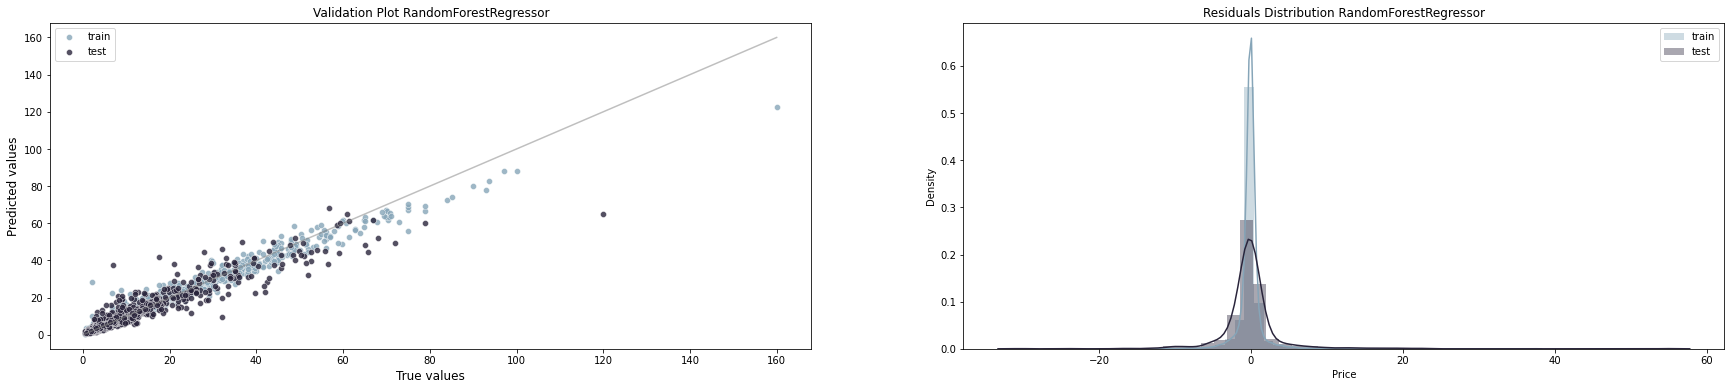

In [27]:
model_rfr = trainmodel(RandomForestRegressor, X_train, y_train, X_test, y_test)

param_grid = [
                {
                    "max_depth" : [80, 90, 100, None],
                    "n_estimators" : [20, 50, 100],
                    "max_features": ["auto", "sqrt"],
                    "criterion" : ["squared_error", "absolute_error", "poisson"]
                }
            ]

grid_rfr = trainmodelGSCV(model_rfr, X_train, y_train, param_grid)

model_rfr = grid_rfr.best_estimator_

plot_rfr = plot_validation_bis(model_rfr, X_train, y_train, X_test, y_test, TARGET, "RandomForestRegressor", COLORS[2], COLORS[6])

##### *Il faut noter que de façon générale et pour une très large majorité des situations, la prédiction est d’un bon niveau. La plupart des points sont très proches de la droite qui symbolise les valeurs attendues. Les écarts entre les valeurs attendues et les valeurs prédites sont donc corrects dans ce modèle. On remarque cependant encore une légère « dérive » surtout pour les valeurs les plus élevées. En revanche la prédiction est très efficace en dessous de $40 000, principalement dû au fait que le nombre de données ayant permis de déterminer la prédiction est important. Cela se traduit par le score R2 (du jeu de TEST) de l’algorithme RandomForestRegressor qui est de 0.83% après avoir effectué un GridSearchCV (Annexe 7). C’est un score correct.*

## **Prediction 🔎**

In [28]:
y_val_df = pd.DataFrame(y_test)
y_val_df["LinearRegression"] = model_ll.predict(X_test)
y_val_df["RandomForestRegressor"] = model_rfr.predict(X_test)

In [29]:
df_predicted = pd.concat([data, y_val_df],axis=1)

### Je supprime la colonne Price qui est en double (10ème et 12ème position)
column_numbers = [x for x in range(df_predicted.shape[1])]
indexs = [i for i, e in enumerate(df_predicted.columns.tolist()) if e == 'Price']
indexs = indexs[1:]
for index in indexs:
    column_numbers.pop(index)
df_predicted = df_predicted.iloc[:, column_numbers]

# # ### Je supprime les valeurs manquantes de prédiction
masknotna = df_predicted["RandomForestRegressor"].notna()
df_predicted_not_na = df_predicted[masknotna]
# df_predicted_not_na.head()
print(df_predicted_not_na.shape)
df_predicted_not_na.reset_index(inplace=True, drop=True)
df_predicted_not_na.head()

(1160, 12)


,Year,Owner_Type,Seats,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price,LinearRegression,RandomForestRegressor
0,2012,First,7,87000.0,Diesel,Manual,20.77,1248.0,88.76,6.00,2.775330,6.0860
1,2013,First,5,86999.0,Diesel,Manual,23.08,1461.0,63.10,3.50,1.752425,3.9734
2,2016,First,8,36000.0,Diesel,Automatic,11.36,2755.0,171.50,17.50,23.002603,18.1178
3,2012,First,5,60000.0,Petrol,Automatic,16.80,1497.0,116.30,4.49,8.941489,5.4974
4,2015,First,5,64424.0,Diesel,Manual,25.20,1248.0,74.00,5.60,5.025072,4.9380


##### *Cet algorithme fait partie d’une famille d’algorithmes récents et plus ou moins complexes (exemple : Xgboost…) qui parviennent à prédire des résultats cohérents avec un très bon R2 dans une grande majeure partie des situations. Il devient alors intéressant d'arriver à améliorer ce score. Il faut pour cela bien nettoyer nos données étudier les règles "métier" liées à celle-ci, procéder à du Feature Engineering ... En bref, analyser, comprendre et décortiquer au maximum nos données.* 🧐


## **Amélioration des modeles ↗️**

In [30]:
data2 = data_train_global.copy()

In [31]:
data2

,Name,Year,Owner_Type,Seats,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,Hyundai Creta 1.6 CRDi SX Option,2015,First,5,41000.0,Diesel,Manual,19.67,1582.0,126.20,12.50
1,Honda Jazz V,2011,First,5,46000.0,Petrol,Manual,18.20,1199.0,88.70,4.50
2,Suzuki Ertiga VDI,2012,First,7,87000.0,Diesel,Manual,20.77,1248.0,88.76,6.00
3,Audi A4 New 2.0 TDI Multitronic,2013,Second,5,40670.0,Diesel,Automatic,15.20,1968.0,140.80,17.74
4,Nissan Micra Diesel XV,2013,First,5,86999.0,Diesel,Manual,23.08,1461.0,63.10,3.50
...,...,...,...,...,...,...,...,...,...,...,...
5802,Suzuki Swift VDI,2014,First,5,27365.0,Diesel,Manual,28.40,1248.0,74.00,4.75
5803,Hyundai Xcent 1.1 CRDi S,2015,First,5,100000.0,Diesel,Manual,24.40,1120.0,71.00,4.00
5804,Mahindra Xylo D4 BSIV,2012,Second,8,55000.0,Diesel,Manual,14.00,2498.0,112.00,2.90
5805,Suzuki Wagon R VXI,2013,First,5,46000.0,Petrol,Manual,18.90,998.0,67.10,2.65


Nombres des variables quantitatives:  7
Nombres des variables qualitatives:  4


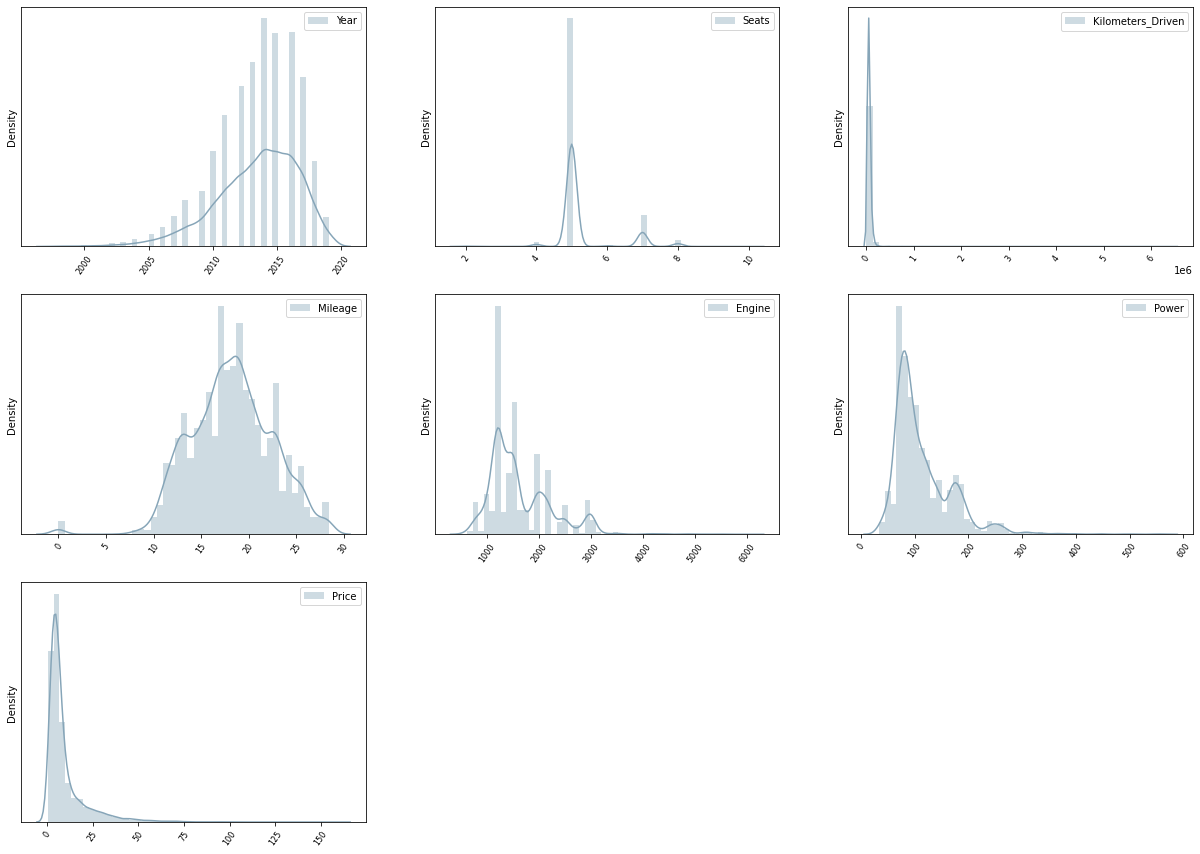

In [32]:
### Répartition des features
featuresrepartition(data2, COLORS[2])

##### *Lors de la première phase du projet « Marco Casion » une visualisation de la distribution des features avait permis d’observer une valeur outlier au sein de la feature Kilometers_Driven. En effet une voiture possédait plus de 6 000 000 de kilomètres. Cette voiture avait donc été écartée du jeu de donnée fournie par la société. Mais ce n’est pas suffisant !*

In [33]:
data2 = data2[data2["Kilometers_Driven"].between(left=0, right=200000)]

## **ZSCORE 💤**
##### *Afin d’améliorer les distributions des différentes séries du jeu de données, un Z score sera appliqué sur celle-ci.*
##### *Source :*
##### *⦁	https://help.tableau.com/current/pro/desktop/fr-fr/calculating_z_scores.htm* 
##### *En statistiques, le Z score (ou score standard) d'une observation désigne le nombre d'écarts-types qui se trouve au-dessus ou en dessous de la moyenne de la population. Pour calculer un résultat z, vous devez connaître la moyenne de population et l'écart-type de population. Créer une visualisation de score z pour répondre aux questions du type suivant :* 
##### *⦁	Quel pourcentage de valeurs est-il inférieur à une valeur spécifique ?*
##### *⦁	Quelles valeurs peuvent être considérées comme exceptionnelles ?*
##### *Le ZSCORE va me permettre d'exclure les valeurs non représentatives au sein des certaines distributions de mon jeu de donnée (Power, Kilometers_Driven, Engine, Mileage).*

![Screenshot](https://github.com/tomcdev63/ML/blob/main/cars/src/static/images/z_score.png?raw=true)

In [34]:
print(data2.shape)

data2 = zscore(data2, "Power")
data2 = zscore(data2, "Kilometers_Driven")
data2 = zscore(data2, "Engine")
data2 = zscore(data2, "Mileage")

print(data2.shape)

(5779, 11)
(5603, 11)


Nombres des variables quantitatives:  7
Nombres des variables qualitatives:  4


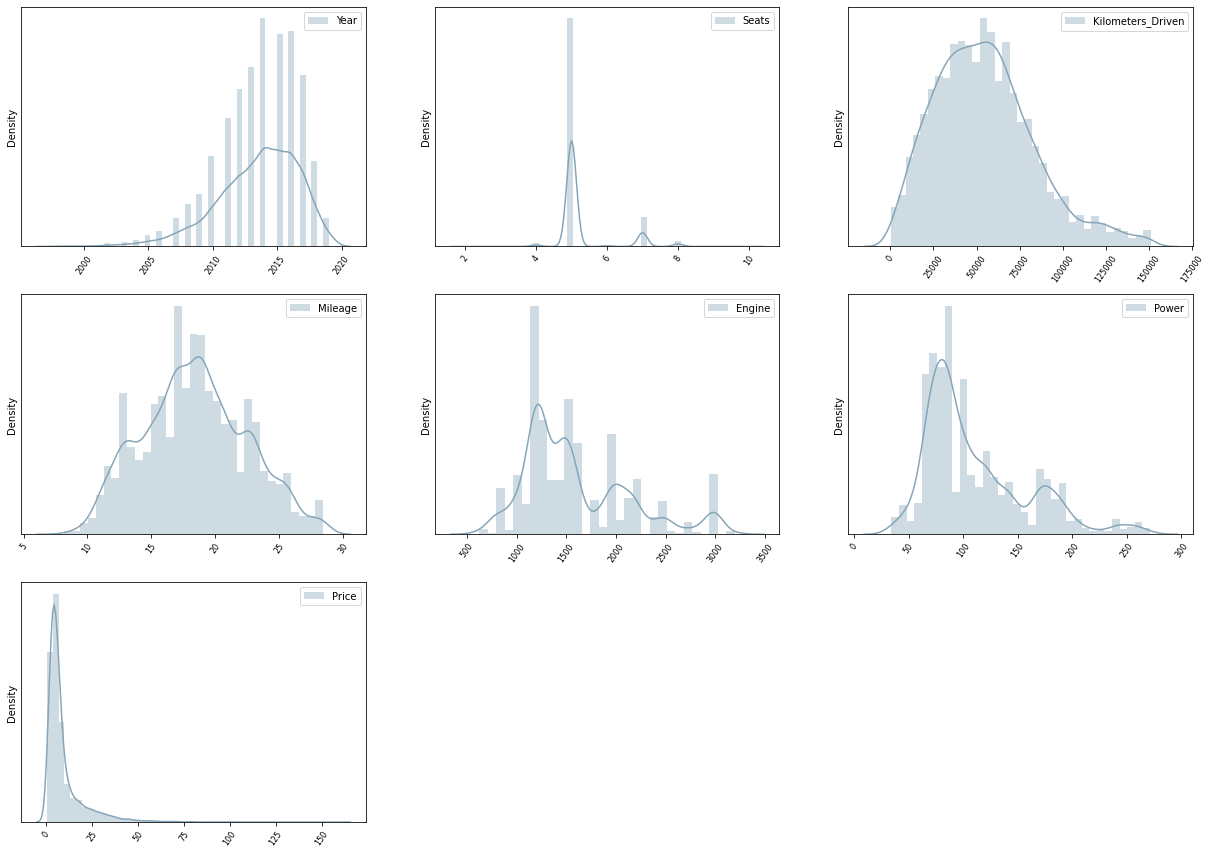

In [35]:
### Répartition des features
featuresrepartition(data2, COLORS[2])

##### *La répartition des distributions de mes features est à présent beaucoup plus harmonieuse!* 😀

## **Feature engineering** 📐

##### *Il est maintenant essentiel de passer par une phase de Feature Engineering.*
##### *« Le Feature Engineering est un processus qui consiste à transformer les données brutes en caractéristiques représentant plus précisément le problème sous-jacent au modèle prédictif. Pour faire simple, il s’agit d’appliquer une connaissance du domaine pour extraire des représentations analytiques à partir des données brutes et de les préparer pour le Machine Learning.*
##### *Il s’agit de la première étape dans le développement d’un modèle de Machine Learning prédictif. Ceci permet d’accroître l’exactitude du modèle sur les nouvelles données inconnues. »*


##### *Afin de faciliter l'apprentissage de mon modèle, je décide de simplifier la colonne "Year" (allant de 1998 à 2019) en soustrayant l'année actuelle (2022) par l'année de fabrication de la voiture. La feature "Year" devient alors "Seniority".*

In [36]:
data2["Year"] = [2021 - x for x in data2["Year"]]
data2 = data2.rename({"Year": "Seniority"}, axis=1)

##### *La feature « Name » du jeu de donnée contient deux éléments distincts :*
##### *⦁ Marque de la voiture (exemple Audi)*
##### *⦁	Modèle de la voiture (exemple : A4 New 2.0 TDI Multitronic)*

##### *Je décide alors de splitter ces deux éléments et de créer une nouvelle feature contenant uniquement la marque de la voiture.*
#####  *Cette nouvelle colonne portera à présent le nom « Brands ». Il sera alors possible de compléter les analyses, par exemple par :*
##### *⦁	Le rapport de prix entre les différentes marques*
##### *⦁	Les marques de voitures les plus vendues en Inde*


In [37]:
data2["Name"].value_counts()

Mahindra XUV500 W8 2WD                                  49
Suzuki Swift VDI                                        44
Suzuki Swift Dzire VDI                                  33
Honda City 1.5 S MT                                     33
Suzuki Ritz VDi                                         30
                                                        ..
Mahindra Quanto C2                                       1
Suzuki Ciaz 1.4 Alpha                                    1
Mercedes-Benz E-Class 2009-2013 E 200 CGI Avantgarde     1
Skoda Superb Elegance 1.8 TSI MT                         1
Mahindra Xylo D4 BSIV                                    1
Name: Name, Length: 1712, dtype: int64

In [38]:
data2["Brands"] = [x.split()[0] for x in data2["Name"]]
data2["Name"] = [" ".join(x.split()[1:]) for x in data2["Name"]]
data2["Brands"] = [str(x).replace("ISUZU","Isuzu") for x in data2["Brands"]]

data2 = data2.reindex(columns=["Brands", "Name", "Seniority", "Owner_Type", "Seats", "Kilometers_Driven", "Fuel_Type","Transmission", "Mileage", "Engine", "Power", "Price"])
data2.drop("Name",axis=1, inplace=True)

In [39]:
data2.head()

,Brands,Seniority,Owner_Type,Seats,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,Hyundai,6,First,5,41000.0,Diesel,Manual,19.67,1582.0,126.20,12.50
1,Honda,10,First,5,46000.0,Petrol,Manual,18.20,1199.0,88.70,4.50
2,Suzuki,9,First,7,87000.0,Diesel,Manual,20.77,1248.0,88.76,6.00
3,Audi,8,Second,5,40670.0,Diesel,Automatic,15.20,1968.0,140.80,17.74
4,Nissan,8,First,5,86999.0,Diesel,Manual,23.08,1461.0,63.10,3.50


##### *⦁    Je décide à présent de faire figurer le pays d'origine ainsi que le continent de la marque en question au sein des nouvelles colonnes : Country et Continent*

In [43]:
dict_country = { "Suzuki":"Japan", "Hyundai":"Korea", "Honda":"Japan", "Toyota":"Japan", "Volkswagen":"Germany",
                "Ford":"Américain", "Mercedes-Benz":"Germany", "Mahindra":"India", "BMW":"Germany", "Audi":"Germany", "Tata":"Inde", 
                "Skoda":"Czech", "Renault":"France", "Chevrolet":"USA", "Nissan":"Japan", "Land":"England","Jaguar":"England",
                "Mini":"England","Mitsubishi":"Japan", "Fiat":"Italy", "Volvo":"Sweden", "Jeep":"USA", "Datsun":"Japan",
                "Porsche":"Germany", "Isuzu":"Japan", "Force":"India", "Ambassador":"India" 
                }

dict_continent = { "Japan":"Asia", "Korea":"Asia", "Germany":"Europe","USA":"America", "India":"Asia",  
                "Czech":"Europe", "France":"Europe", "England":"Europe", "Italy":"Europe","Sweden":"Europe"}

data2["Country"] = data2["Brands"].map(dict_country)
data2["Continent"] = data2["Country"].map(dict_continent)

data2.head()


,Brands,Seniority,Owner_Type,Seats,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price,Country,Continent
0,Hyundai,6,First,5,41000.0,Diesel,Manual,19.67,1582.0,126.20,12.50,Korea,Asia
1,Honda,10,First,5,46000.0,Petrol,Manual,18.20,1199.0,88.70,4.50,Japan,Asia
2,Suzuki,9,First,7,87000.0,Diesel,Manual,20.77,1248.0,88.76,6.00,Japan,Asia
3,Audi,8,Second,5,40670.0,Diesel,Automatic,15.20,1968.0,140.80,17.74,Germany,Europe
4,Nissan,8,First,5,86999.0,Diesel,Manual,23.08,1461.0,63.10,3.50,Japan,Asia


In [44]:
datajointplot = data2[data2["Brands"].isin(["Mercedes-Benz", "Fiat", "BMW"])]

##### *⦁	Ce Jointplot permet de mettre en évidence que d’une marque à l’autre, les domaines de prix et de puissance peuvent être complétement distincts.*


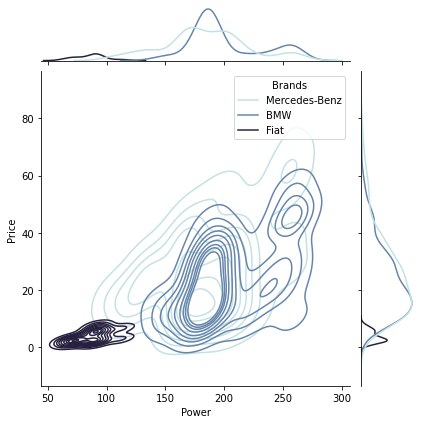

In [45]:
sns.jointplot(data=datajointplot, x="Power", y="Price", hue="Brands", kind="kde", palette=PAL)

##### *⦁	Ce Jointplot permet de mettre en évidence qu’au sein du jeu de données les voitures à boîte automatique ont tendance à être plus chères et plus puissantes que les voitures à boîte manuelle.*


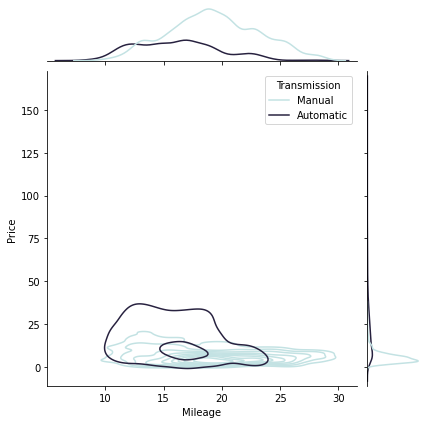

In [46]:
sns.jointplot(data=data2, x="Mileage", y="Price", hue="Transmission", kind="kde", palette=PAL)

##### ⦁ *On peut ici observer que les voitures de marque Asiatique Suzuki, Hyundai, Honda et Toyota sont les voitures d'occasion les plus vendues en Inde.*


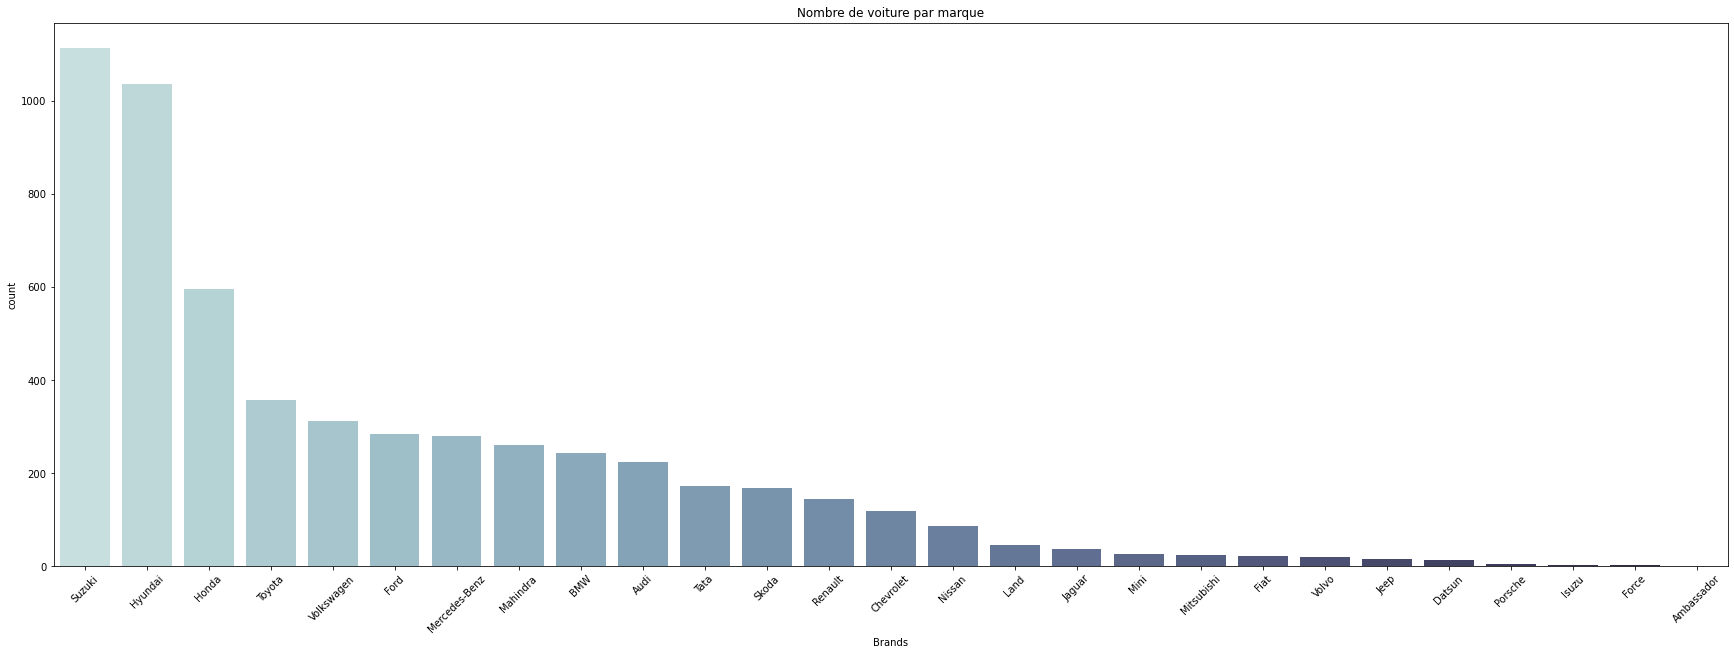

In [40]:
countplot(data2, "Brands", PAL, "Nombre de voiture par marque")

In [41]:
data2["Brands"].value_counts().to_frame()

,Brands
Suzuki,1112
Hyundai,1035
Honda,595
Toyota,356
Volkswagen,311
Ford,284
Mercedes-Benz,279
Mahindra,261
BMW,242
Audi,224


##### *⦁    Ce graphique met en évidence que les marques de voiture Porsche, Land Rover et Jaguar sont de loin les plus chères.*

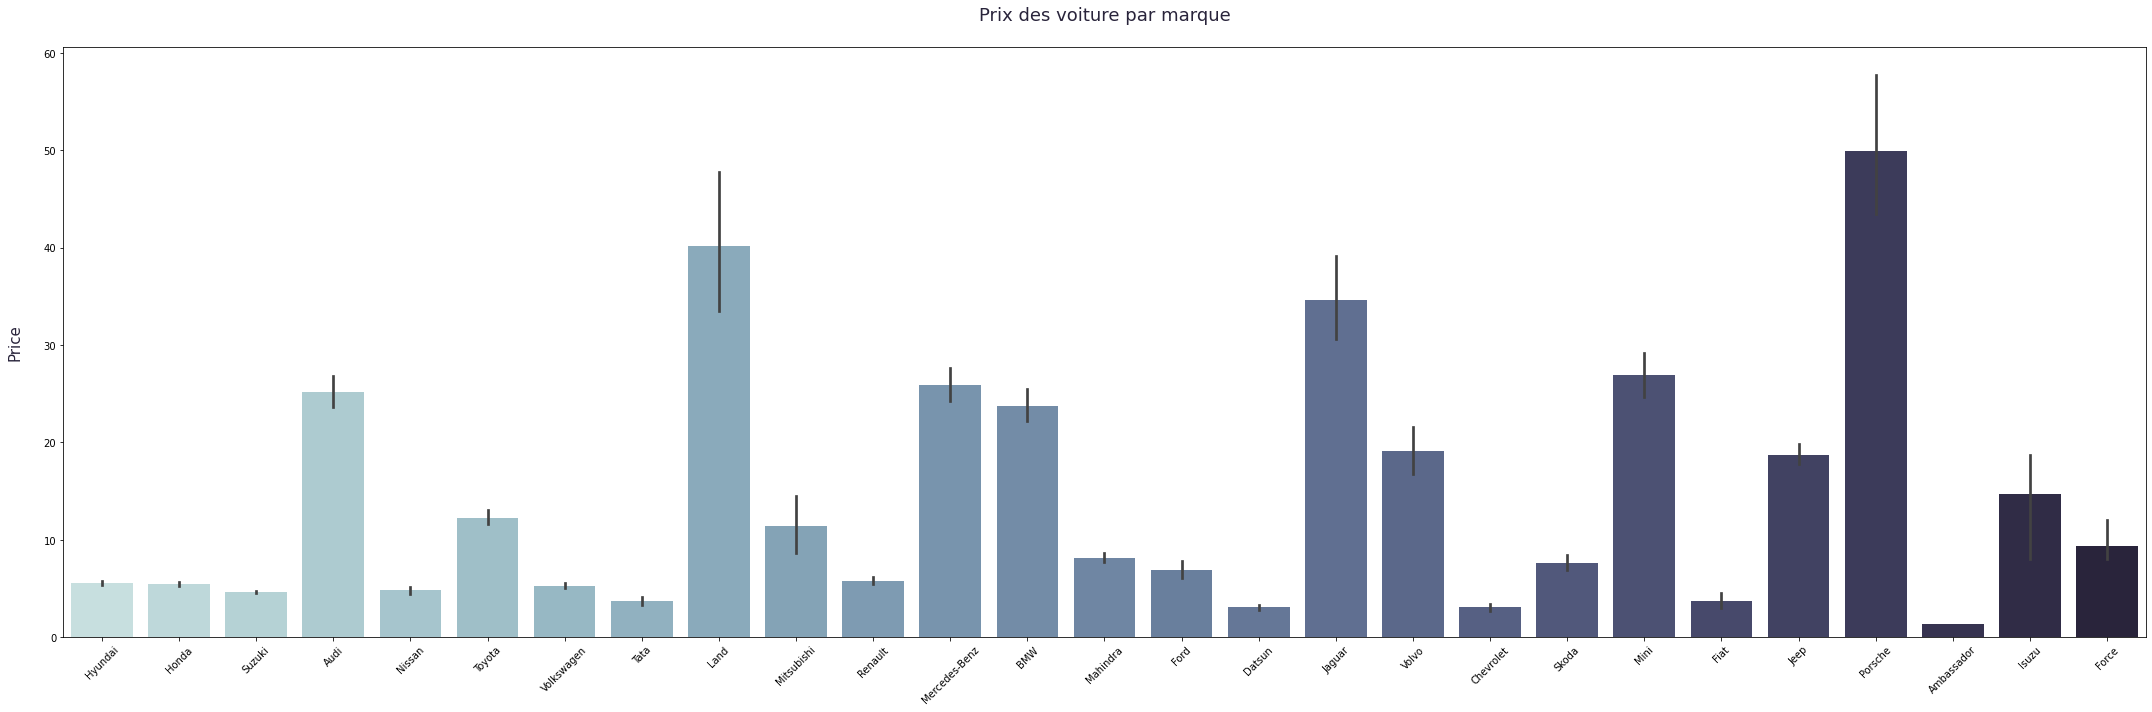

In [42]:
barplot(data2, "Brands", "Price", PAL, COLORS[6], COLORS[6], "Prix des voiture par marque")


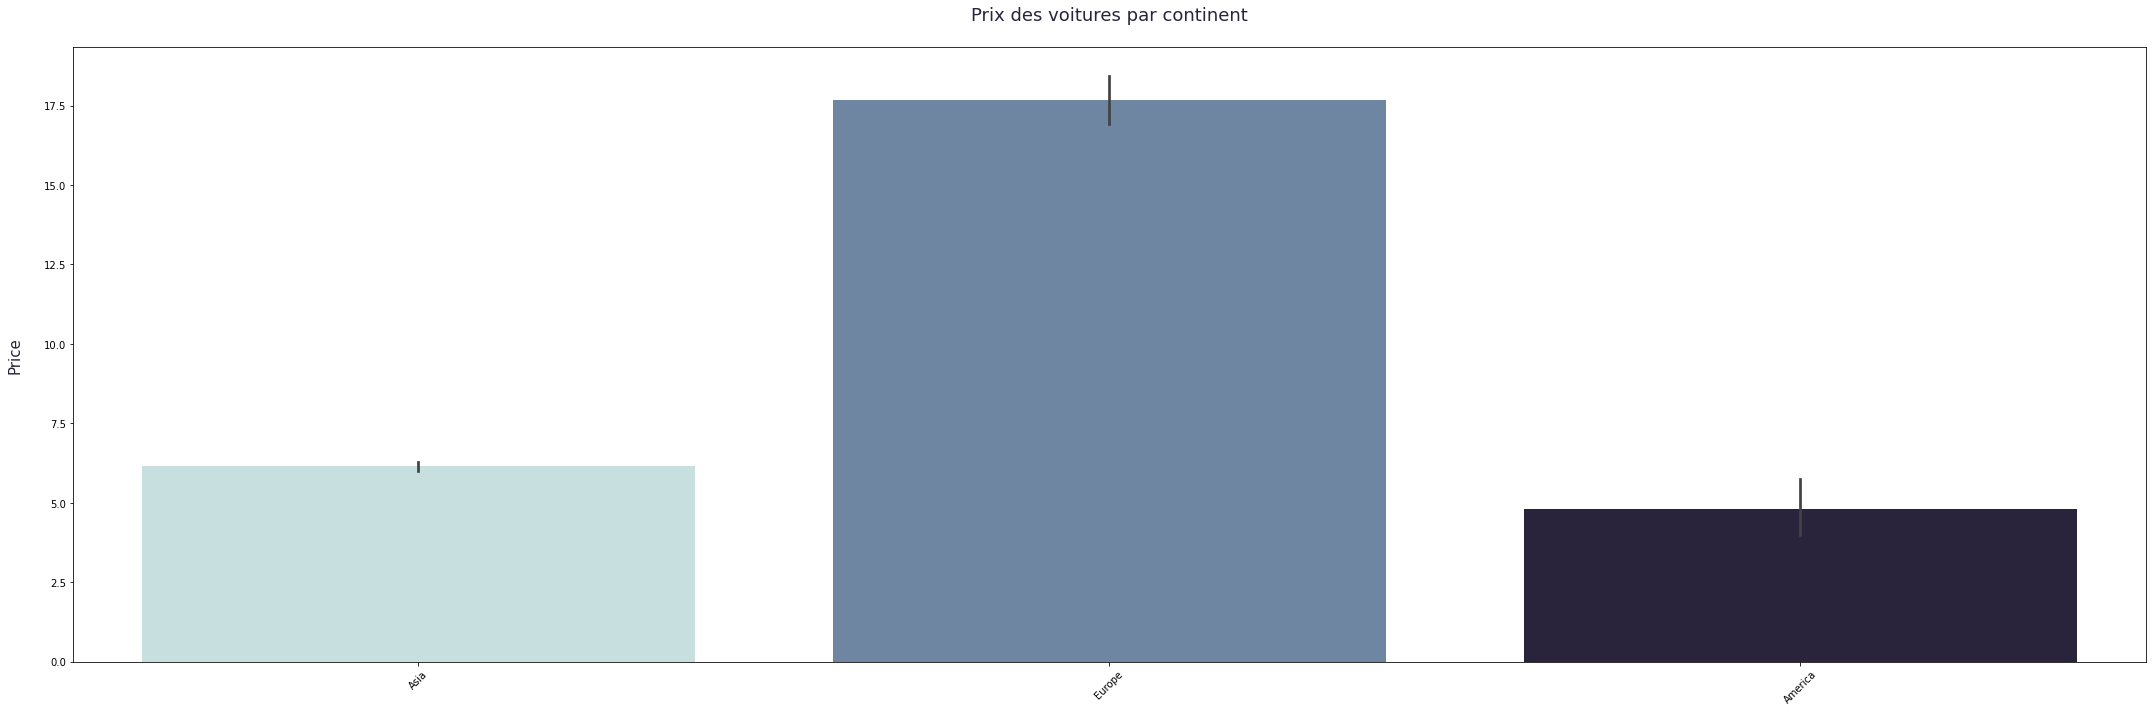

In [48]:
barplot(data2, "Continent", "Price", PAL, COLORS[6], COLORS[6], "Prix des voitures par continent")

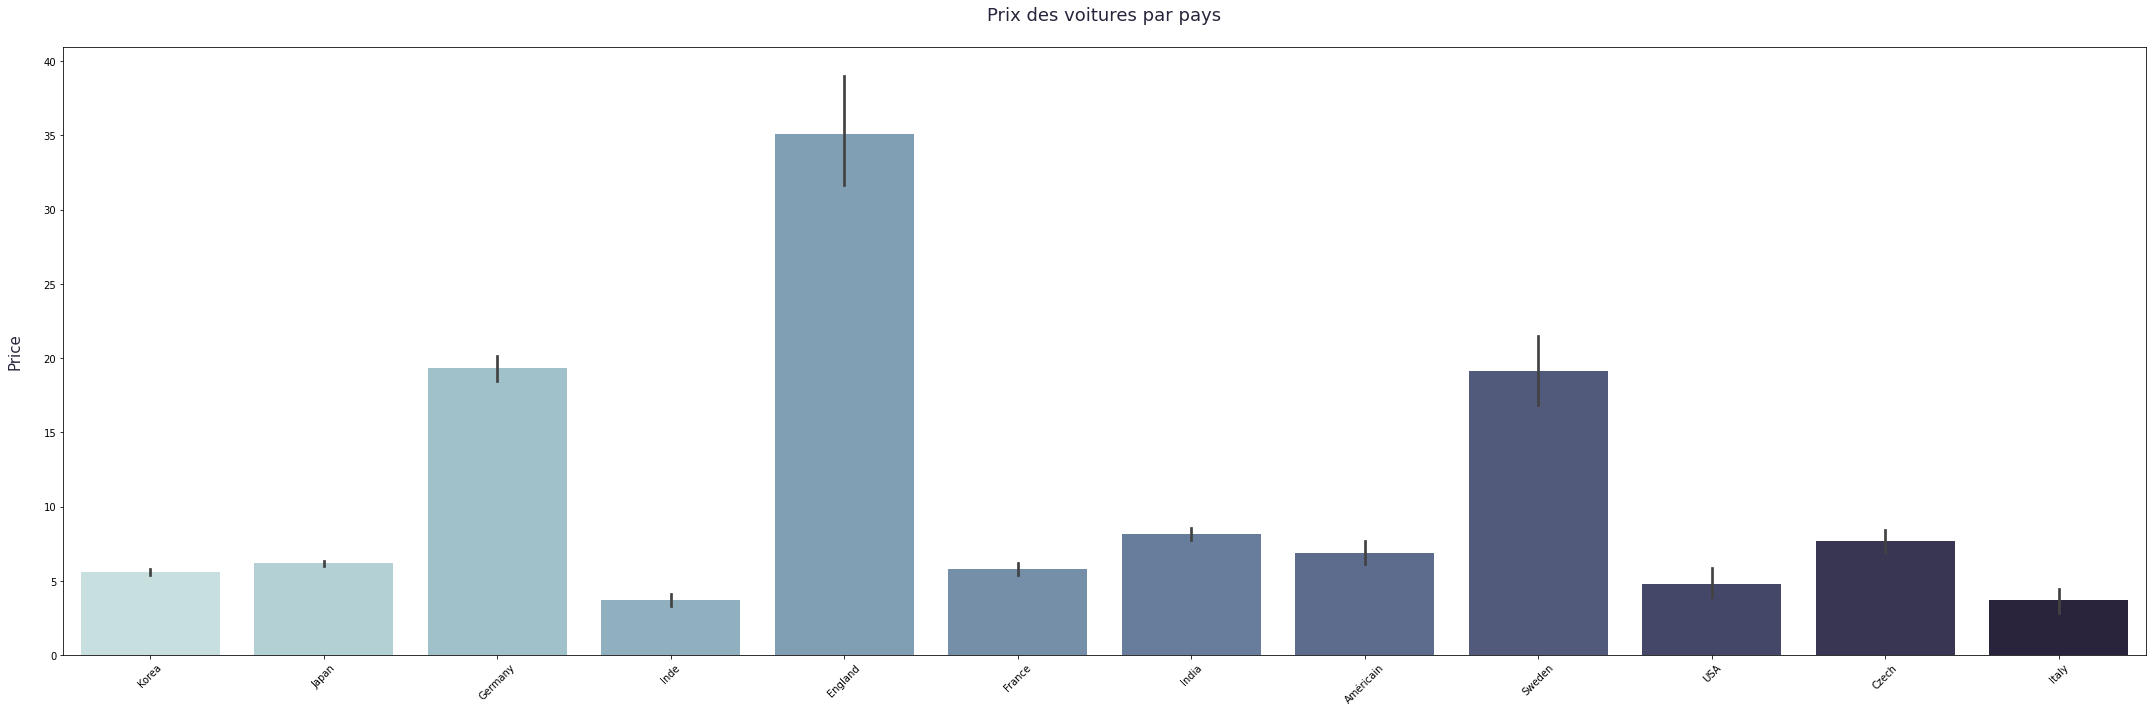

In [49]:
barplot(data2, "Country", "Price", PAL, COLORS[6], COLORS[6], "Prix des voitures par pays")

##### *Ces visualisations graphiques permettent de dire qu'en règle générale (et au sein de mon jeu de donnée), les voitures Européennes sont les plus chères.*
##### *On peut aussi observer que les marques les plus chères sont Anglaises. En effet à ce niveau de nettoyage des données il reste 3 marques Anglaise : Jaguar, LandRover et Mini. Ce sont des marques plutôt luxueuses. Ce sont ensuite les marques Allemandes et Suédoises qui sont les plus chères. Ce sont des marques prisées, et orientées sur le marché de l'automobile « haut de gamme » et sportives. Audi, BMW, Mercedes, Porsche et Volvo constituent ces marques Allemandes et Suédoises.*

In [50]:
data2["Owner_Type"] = [str(x).replace("First", "1") for x in data2["Owner_Type"]]
data2["Owner_Type"] = [str(x).replace("Second", "2") for x in data2["Owner_Type"]]
data2["Owner_Type"] = [str(x).replace("Third", "3") for x in data2["Owner_Type"]]
data2["Owner_Type"] = [str(x).replace("Fourth & Above", "4") for x in data2["Owner_Type"]]

data2["Owner_Type"]= data2["Owner_Type"].astype(np.int64)

In [51]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brands             5603 non-null   object 
 1   Seniority          5603 non-null   int64  
 2   Owner_Type         5603 non-null   int64  
 3   Seats              5603 non-null   int64  
 4   Kilometers_Driven  5603 non-null   float64
 5   Fuel_Type          5603 non-null   object 
 6   Transmission       5603 non-null   object 
 7   Mileage            5603 non-null   float64
 8   Engine             5603 non-null   float64
 9   Power              5603 non-null   float64
 10  Price              5603 non-null   float64
 11  Country            5603 non-null   object 
 12  Continent          5146 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 569.2+ KB


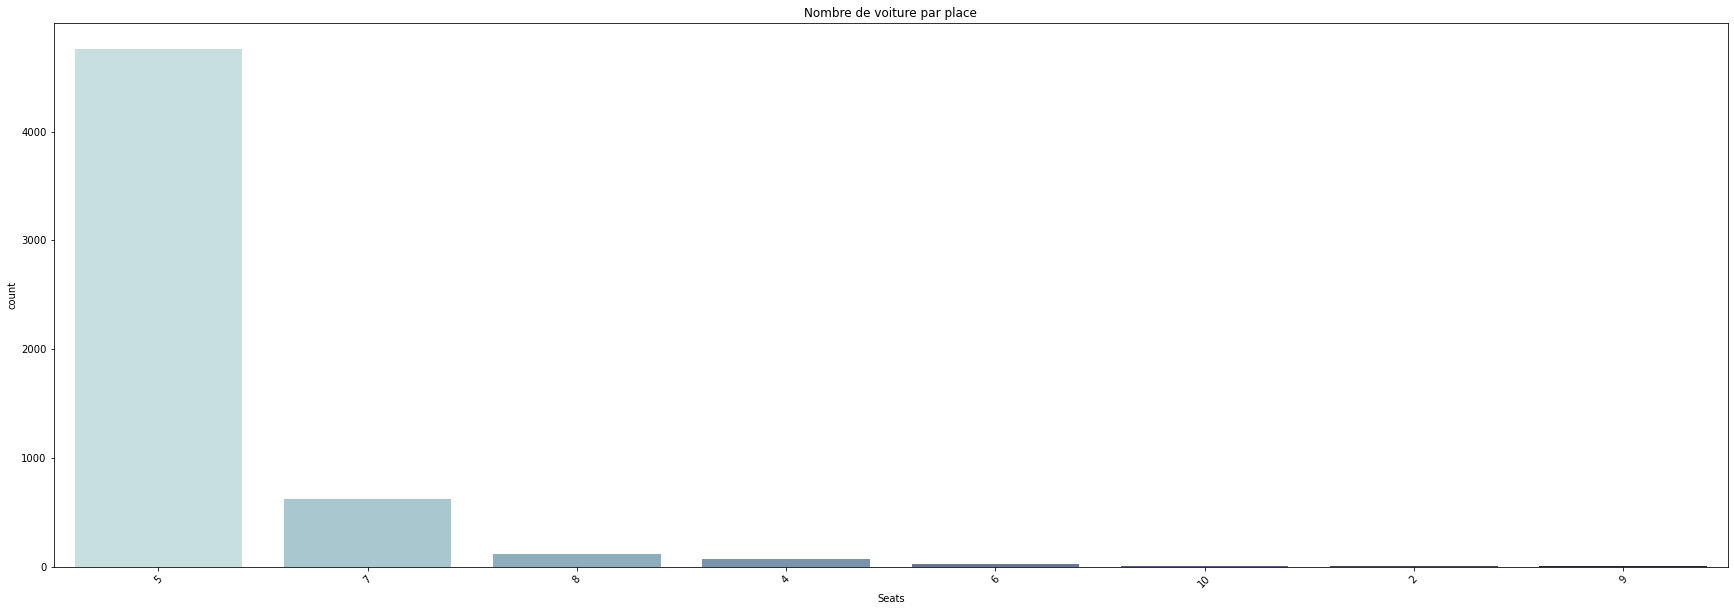

In [52]:
countplot(data2, "Seats", PAL, "Nombre de voiture par place")

##### *Le nombre de voitures à 5 places domine nettement dans ce jeu de donnée!*
##### ⚠️ *J'ai donc essayé de garder uniquement les voitures possédants 5 et 7 places afin d'améliorer les prédictions des algorithmes. Mais sans succès.* 😔
##### 📌 *Le test est disponible à ce chemin: src/app/test/00_TEST_SEATS_2_5.ipynb*

In [53]:
### Ne garder que les voitures à 5 ou 7 places

# print(data2.shape)
# data2 = data2.loc[data2["Seats"].isin([5,7])]
# print(data2.shape)

##### *Cette matrice de corrélation me permet d’étudier les différentes relations entre les variables de mon DataFrame :*
##### *⦁	Le nombre de chevaux din (Power) et la cylindrée (Engine) sont étroitement liés : 0.86*
##### *⦁	Plus le nombre de chevaux din (Power) est important plus le prix de la voiture (Price) est élevé : 0.76*
##### *⦁	La transmission (manuelle ou automatique) est fortement liée à la puissance de la voiture (Power) : - 0.66*
##### *⦁	Plus la cylindrée (Engine) est importante plus le prix de la voiture (Price) est élevé : 0.64*
##### *⦁	Plus le nombre de chevaux din (Power) est important plus la consommation de la voiture (Mileage) est élevée : - 0.55*
##### *⦁	Plus une voiture est ancienne (Seniority) plus son nombre de kilomètres parcourus (Kilometers_Driven) est important : 0.51*
##### *⦁	Le nombre de place (Seats) a une corrélation liée à la cylindrée (Engine) d’une voiture : 0.48 (les voitures 2 places ont de grosses cylindrées)*
##### *⦁	La cylindrée (Engine) est aussi étroitement liée au type de carburant de la voiture (Fuel_Type) en question : - 0.48*
##### *⦁	Plus une voiture est ancienne (Seniority) plus son nombre de mains (Owner_Type) est important : 0.38*
##### *⦁	La transmission a aussi une corrélation non négligeable avec la consommation (Mileage) : 0.36*

##### D’autres relations peuvent aussi être évoquées lors de cette phase d’analyse. Mais celle-ci sont bien moins « marquées » que les relations citées au-dessus.*


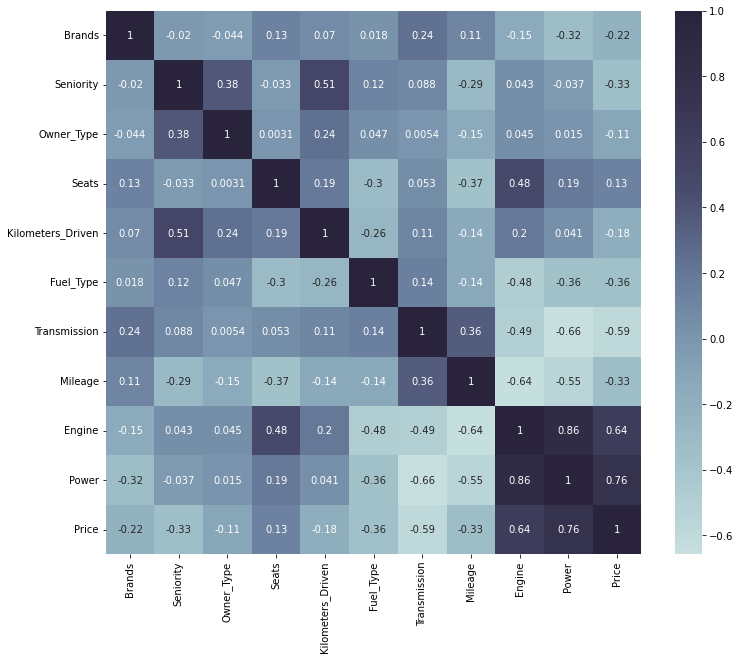

In [54]:
CATEGORICAL_COLS = ["Brands","Fuel_Type", "Transmission"]

plt.figure(figsize=(12,10))
X_cor = pd.DataFrame.copy(data2)
for c in CATEGORICAL_COLS:
    X_cor[c] = pd.Categorical(X_cor[c])
    X_cor[c] = X_cor[c].cat.codes
cmap = get_custom_color_palette_hash()
sns.heatmap(X_cor.corr(), xticklabels=True, yticklabels=True, cmap=cmap, annot=True)
plt.show()

## **Attribution et suppression de la cible 🎯**

In [55]:
TARGET2 = data2["Price"]

In [56]:
### Afin d'entrainer mon modele je supprime ma TARGET
data2.drop("Price", axis=1, inplace=True)

## **Normalisation de mes données (TRAIN et TEST) via un preprocessor💻**

In [57]:
data2_preprocess = data2[["Brands", "Seniority", "Owner_Type", "Seats", "Kilometers_Driven", "Fuel_Type", "Transmission", "Mileage", "Engine", "Power"]]

preprocessor2 = Preprocessor()
preprocessor2.fit(data2_preprocess)
preprocessor2.save("../../data/preprocessor/preprocessor2")

In [58]:
NUM_COL_LIST = data2_preprocess.select_dtypes(exclude='object').columns.tolist()
CAT_COL_LIST = []

for col in data2_preprocess.select_dtypes(include='object').columns:
    CAT_COL_LIST += [col + '*' + elem for elem in data2[col].unique().tolist()]

data2_preprocessed = pd.DataFrame(preprocessor2.transform(data2_preprocess), columns = NUM_COL_LIST + CAT_COL_LIST)

print(f"DATA shape: {str(data2.shape)}\nDATA shape:: {str(data2_preprocessed.shape)}")
data2_preprocessed.head()

DATA shape: (5603, 12)
DATA shape:: (5603, 38)


,Seniority,Owner_Type,Seats,Kilometers_Driven,Mileage,Engine,Power,Brands*Hyundai,Brands*Honda,Brands*Suzuki,...,Brands*Fiat,Brands*Jeep,Brands*Porsche,Brands*Ambassador,Brands*Isuzu,Brands*Force,Fuel_Type*Diesel,Fuel_Type*Petrol,Transmission*Manual,Transmission*Automatic
0,0.190476,0.000000,0.375,0.270697,0.567822,0.372183,0.388137,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.380952,0.000000,0.375,0.303847,0.495050,0.223388,0.229929,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.333333,0.000000,0.625,0.575678,0.622277,0.242424,0.230182,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.285714,0.333333,0.375,0.268509,0.346535,0.522145,0.449732,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.285714,0.000000,0.375,0.575672,0.736634,0.325175,0.121925,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [59]:
### Matrice de correlation avec toutes les marques

# plt.figure(figsize=(30,20))
# correlation = round(data2_preprocessed.corr(),2)
# cmap = get_custom_color_palette_hash()
# sns.heatmap(correlation, cmap=cmap, center=0, annot=True)
# plt.show()

## **Séparation des données ✂️**

In [60]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2_preprocessed, TARGET2, test_size=0.2 , shuffle=True)
print(f"X_train shape: {str(X_train.shape)} \nX_test shape: {str(X_test.shape)}")

X_train shape: (4640, 14) 
X_test shape: (1160, 14)


## **Création d'un modèle V2 de regression linéaire avec LinearRegression 📈**

Score du jeu TRAIN
MAE:  2.7563905653254928
RMSE:  4.897342709409901
Median abs err:  1.6096593494716864
R2:  0.7743200440690092

Score du jeu TEST
MAE:  2.7169400201849885
RMSE:  4.3449265689892576
Median abs err:  1.6683590479859163
R2:  0.7915874274551624


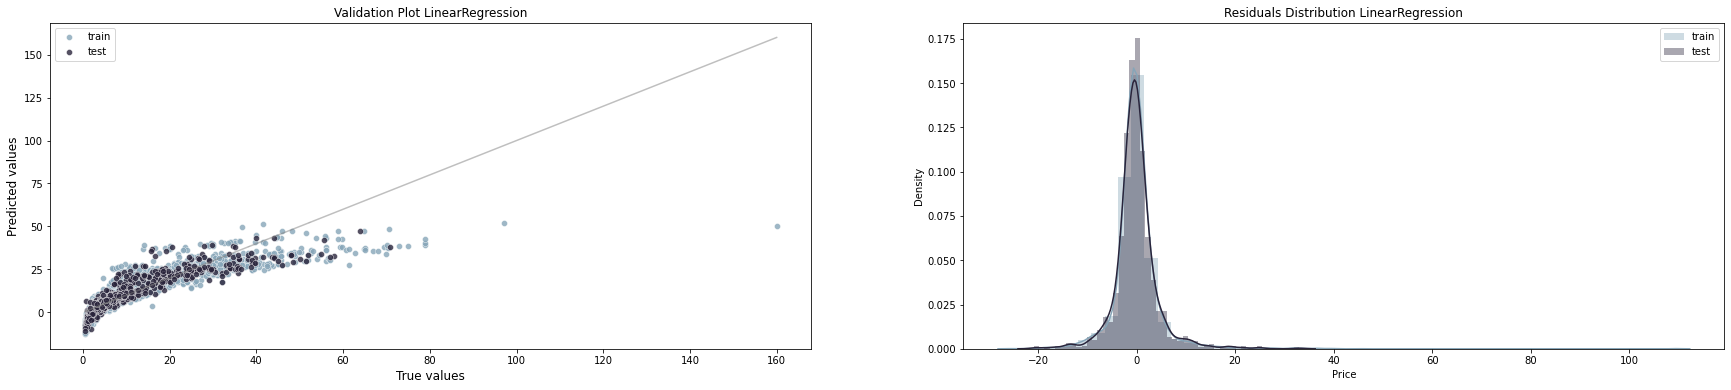

In [61]:
model_ll2 = trainmodel(LinearRegression, X_train2, y_train2, X_test2, y_test2)

plot_ll2 = plot_validation_bis(model_ll2, X_train2, y_train2, X_test2, y_test2, TARGET2, "LinearRegression", COLORS[2], COLORS[6])

##### *Le score R2 de l'algorithme de LinearRegression est passé de 0.72 à 0.79 sur les jeux de test! Les divers méthodes de cleaning / preprocessing et feature engineering sont parvenues à augmenter les scores de notre modèle et donc améliorer ses prédictions!* 🥳

## **Enregistrement du modèle 💾**

In [62]:
pickle.dump(model_ll2, open("../../data/models/linear_regression_best_78%", "wb"))

## **Création d'un modèle V2 de regression linéaire avec RandomForestRegressor 🌲**

Score du jeu TRAIN
MAE:  0.5273076153821634
RMSE:  1.1584698074791957
Median abs err:  0.2542500000000074
R2:  0.9873718004920993

Score du jeu TEST
MAE:  1.295791598204551
RMSE:  2.595567155808776
Median abs err:  0.6578000000000017
R2:  0.9256255833975476

Score après GridSearchCV
CV Mean:  0.904516461915185
STD:  0.029935922857232764
Le meilleur score est de: 0.8938230870690391 avec {'criterion': 'poisson', 'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 100}


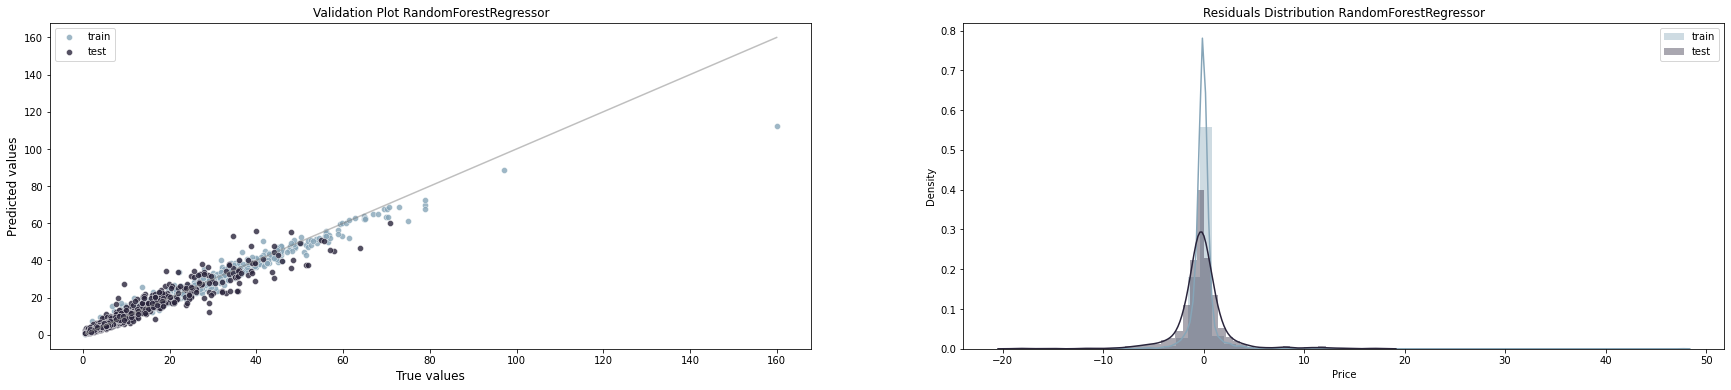

In [63]:
model_rfr2 = trainmodel(RandomForestRegressor, X_train2, y_train2, X_test2, y_test2)

param_grid = [
                {
                    "max_depth" : [80, 90, 100, None],
                    "n_estimators" : [20, 50, 100],
                    "max_features": ["auto", "sqrt"],
                    "criterion" : ["squared_error", "absolute_error", "poisson"]
                }
            ]

grid_rfr2 = trainmodelGSCV(model_rfr2, X_train2, y_train2, param_grid)

model_rfr2 = grid_rfr2.best_estimator_

plot_rfr2 = plot_validation_bis(model_rfr2, X_train2, y_train2, X_test2, y_test2, TARGET2, "RandomForestRegressor", COLORS[2], COLORS[6])

##### *Le résultat obtenu dans le modèle issu du projet MARCO CASION (modèle prédictif de la valeur d’achat d’un véhicule d’occasion sur le marché Indien), amène à un R2 de 0.83%, résultat obtenu grâce à l’algorithme RandomForestRegressor.*
##### *Le score R2 de l'algorithme de RandomForestRegressor est passé de 0.83 à 0.89!* 🥳

## **Enregistrement du modèle 💾**

In [64]:
pickle.dump(model_rfr2, open("../../data/models/random_forest_regressor_best_89%", "wb"))

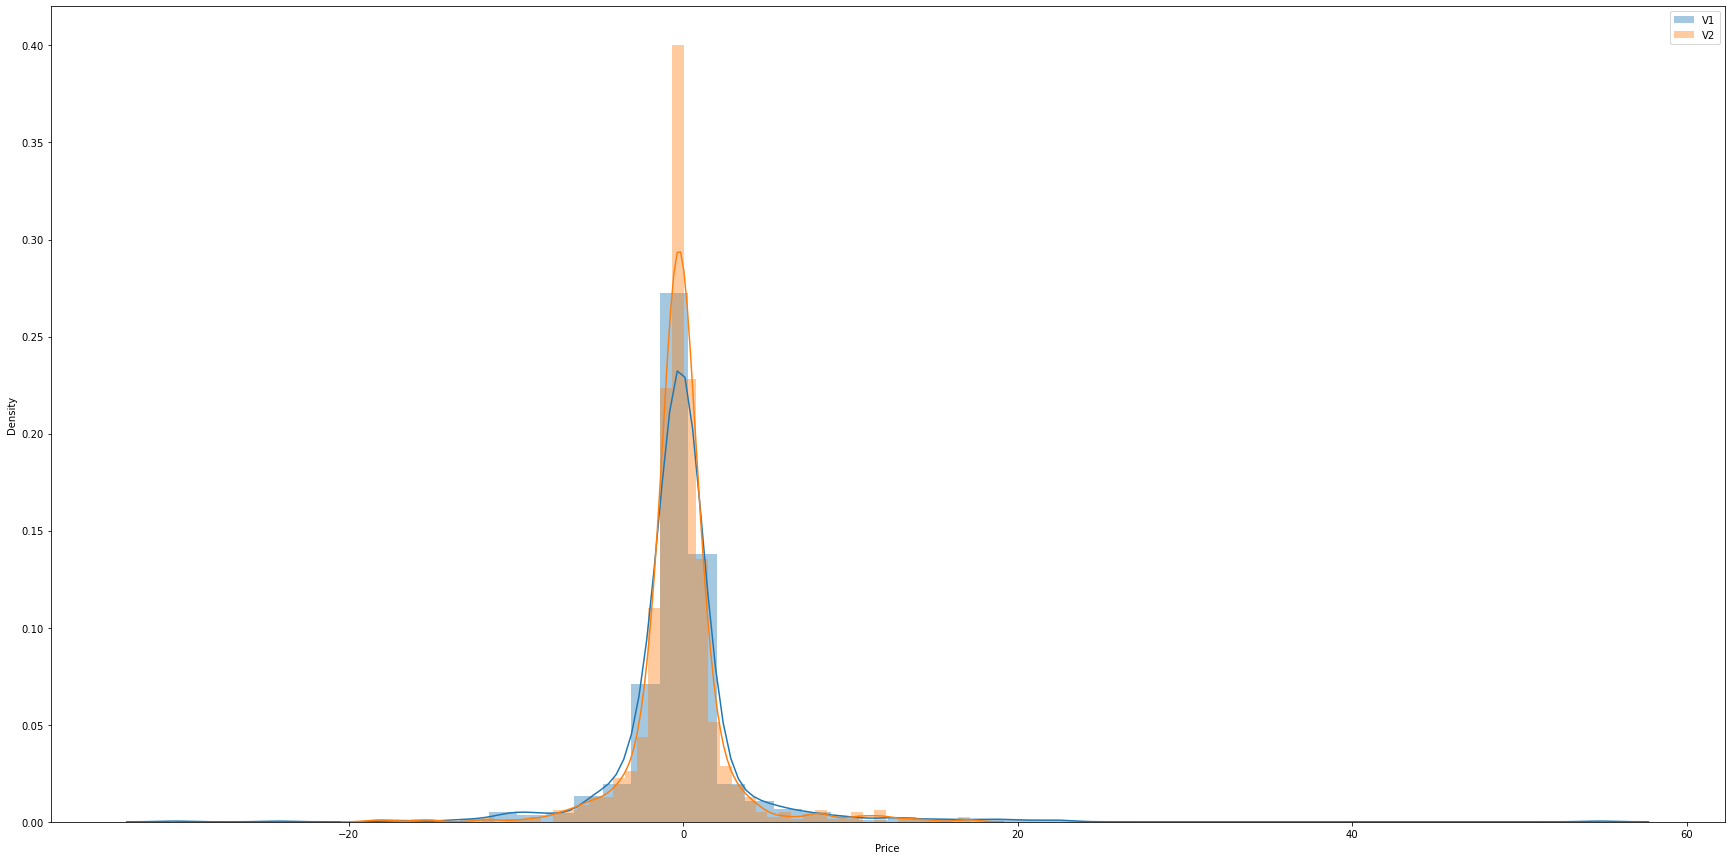

In [65]:
def plot_validation_comparaison(model, model2, X_train, y_train, X_test, y_test, X_train2, y_train2, X_test2, y_test2, target, target2, model_name):
        
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    y_train_pred2 = model2.predict(X_train2)
    y_test_pred2 = model2.predict(X_test2)

    plt.figure(figsize=(30,15))
    
    ### Residuals Distribution
    sns.distplot(y_test-y_test_pred, label='V1')

    ### Residuals Distribution
    sns.distplot(y_test2-y_test_pred2, label='V2')
    
    plt.legend()
    plt.show()
    
plot_validation_comparaison(model_rfr, model_rfr2, X_train, y_train, X_test, y_test, X_train2, y_train2, X_test2, y_test2, TARGET, TARGET2, "RandomForestRegression")

## **Prediction 🔎**

In [66]:
y_val_df = pd.DataFrame(y_test2)
y_val_df["Improved_LinearRegression"] = model_ll2.predict(X_test2)
y_val_df["Improved_RandomForestRegressor"] = model_rfr2.predict(X_test2)

In [67]:
df_predicted2 = pd.concat([data2, y_val_df],axis=1)

### Je supprime la colonne Price qui est en double (10ème et 12ème position)
column_numbers = [x for x in range(df_predicted2.shape[1])]
indexs = [i for i, e in enumerate(df_predicted2.columns.tolist()) if e == 'Price']
indexs = indexs[1:]
for index in indexs:
    column_numbers.pop(index)
df_predicted2 = df_predicted2.iloc[:, column_numbers]

### Je supprime les valeurs manquantes de prédiction
masknotna = df_predicted2["Improved_RandomForestRegressor"].notna()
df_predicted_not_na2 = df_predicted2[masknotna]
print(df_predicted_not_na2.shape)
df_predicted_not_na2.reset_index(inplace=True, drop=True)
df_predicted_not_na2.head(10)

(1121, 15)


,Brands,Seniority,Owner_Type,Seats,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Country,Continent,Price,Improved_LinearRegression,Improved_RandomForestRegressor
0,Tata,9,2,5,65932.0,Diesel,Manual,22.30,1248.0,74.00,Inde,NaN,1.95,1.505885,2.7909
1,Suzuki,3,1,5,25692.0,Petrol,Manual,21.56,1462.0,103.25,Japan,Asia,9.95,11.406543,9.1180
2,Mitsubishi,7,1,7,110000.0,Diesel,Manual,13.50,2477.0,175.56,Japan,Asia,15.00,16.891270,13.6766
3,Suzuki,6,2,5,55392.0,Diesel,Manual,23.65,1248.0,88.50,Japan,Asia,8.25,7.506136,5.7752
4,Nissan,9,1,5,54000.0,Diesel,Manual,23.08,1461.0,63.10,Japan,Asia,4.25,2.050548,2.9894
5,Suzuki,3,1,5,50075.0,Diesel,Manual,24.30,1248.0,88.50,Japan,Asia,8.63,10.284880,8.7128
6,Mercedes-Benz,8,1,5,85000.0,Diesel,Automatic,11.74,2987.0,254.80,Germany,Europe,28.00,32.146183,33.8005
7,Mahindra,4,1,6,22033.0,Diesel,Manual,25.32,1198.0,77.00,India,Asia,5.58,5.077777,6.1349
8,Toyota,5,1,5,52001.0,Petrol,Automatic,14.28,1798.0,138.03,Japan,Asia,10.11,12.947899,12.5744
9,Toyota,9,1,7,70704.0,Petrol,Manual,11.25,2694.0,163.70,Japan,Asia,10.95,14.088583,11.6520


##### *Ce DataFrame permet de mettre en évidence les différentes prédictions de nos deux algorithmes. Il nous suffit alors de comparer les prix d'origine des voitures et les prix prédis par RandomForestRegressor et LinearRegression* 🧐

## **Conclusion 😌**

##### *Grâce aux divers techniques employées (Preprocessing, Feature engineering, meilleure repartition des distribution...) notre algorithme RandomForestRegressor a amélioré sa précision de 0.06%* 🏆

##### *Grâce à un nettoyage approfondi des données (notamment à l’aide du Z score), à une analyse poussée (graphiques visuels, matrice de corrélation), aux différentes techniques de Feature Engineering employées (simplification des données, création de nouvelles features) et aux divers tests effectués, l’ensemble des divers scores de l’algorithme RandomForestRegressor utilisé lors du projet « MARCO CASION » est nettement amélioré ! Le R2 du nouveau modèle est de 0.89 %.*
##### *Bien entendu ce score n’est pas parfait et reste encore certainement perfectible. Ainsi plusieurs autres critères manquants permettraient probablement d’obtenir de meilleures prédictions :*
##### *⦁	Un plus grand nombre de données permettrait d’obtenir une prédiction plus fiable sur le périmètre actuel cela pour les catégories de véhicules les moins représentées*
##### *⦁	L’ajout de véhicules plus anciens à la base de données*
##### *⦁	L’état du véhicule*
##### *⦁	Poids du véhicule*
##### *⦁	Type de véhicule (citadine, berline, 4X4...)*
##### *⦁	Options du véhicule*
##### *⦁	Finitions du véhicule*